<img src="https://i.ytimg.com/vi/tXMSUGud5tA/maxresdefault.jpg" width="300">


# Trabajo Final del curso de Digital Transformation - Python 

Análisis de multas de circulación impuestas en Madrid durante Agosto 2018 a Septiembre 2019
Vamos a analizar los fichero de multas del Ayuntamiento de Madrid, con información sacada del portal de Datos Abiertos: http://datos.madrid.es

## Integrantes: G1
- Rafael Bedolla Guiscafré
- Jaime Cases Ruiz-Cámara
- Edison Erick Salinas Barreda
- Pavel Joffe Ramírez Samaniego

## Descripción del Dataset

CALIFICACIÓN | TIPO DE INFRACCIÓN
:-- | :--
LUGAR| LUGAR DE INFRACCIÓN
FDENUN| FECHA DE DENUNCIA (MM/YYYY) 
HORA| HORA DE LA DENUNCIA (HH.MM) 
IMP_BOL| IMPORTE DEL BOLETÍN (2 Decimales)
DESCUENTO| DESCUENTO ‘SI’ , ‘NO’ 
PUNTOS| PUNTOS DETRAIDOS 
DENUNCIANTE| DENUNCIANTE
HECHO-BOL | HECHO DENUNCIADO 
VEL_LIMITE | VELOCIDAD LIMITE (SI ES DE RADAR) 
VEL_CIRCULA | VELOCIDAD MEDIDA (SI ES DE RADAR) 
COORDENADA-X | COORDENADA X (en formato ETRS89) 
COORDENADA-Y| COORDENADA Y (en formato ETRS89)

# 1. Importamos los paquetes para empezar a trabajar

In [1]:
import pandas as pd
import re
import numpy as np
import datetime
from datetime import datetime,date
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
pd.options.display.float_format = '{:,.1f}'.format
import matplotlib.dates as mdates
%matplotlib inline
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
pd.options.display.float_format = '{:,.1f}'.format

# 2. Cargamos los archivos csv y los nombramos

### 2.1 Cargamos las url de cada mes (Septiembre 2018 - Agosto 2019)

In [2]:
path_web0918='https://datos.madrid.es/egob/catalogo/210104-214-multas-circulacion-detalle.csv'
path_web1018='https://datos.madrid.es/egob/catalogo/210104-218-multas-circulacion-detalle.csv'
path_web1118='https://datos.madrid.es/egob/catalogo/210104-222-multas-circulacion-detalle.csv'
path_web1218='https://datos.madrid.es/egob/catalogo/210104-224-multas-circulacion-detalle.csv'
path_web0119='https://datos.madrid.es/egob/catalogo/210104-226-multas-circulacion-detalle.csv'
path_web0219='https://datos.madrid.es/egob/catalogo/210104-230-multas-circulacion-detalle.csv'
path_web0319='https://datos.madrid.es/egob/catalogo/210104-234-multas-circulacion-detalle.csv'
path_web0419='https://datos.madrid.es/egob/catalogo/210104-238-multas-circulacion-detalle.csv'
path_web0519='https://datos.madrid.es/egob/catalogo/210104-242-multas-circulacion-detalle.csv'
path_web0619='https://datos.madrid.es/egob/catalogo/210104-246-multas-circulacion-detalle.csv'
path_web0719='https://datos.madrid.es/egob/catalogo/210104-252-multas-circulacion-detalle.csv'
path_web0819='https://datos.madrid.es/egob/catalogo/210104-256-multas-circulacion-detalle.csv'

### 2.2 Nombramos las cabeceras de las columnas de cada tabla

In [3]:
#column_names = multas.columns
#print(column_names)

In [4]:
nombre_columnas0918=['GRAVEDAD','DIRECCION','MES','ANIO','HORA','IMPORTE_MULTA',
                     'DESCUENTO','PUNTOS','DENUNCIANTE','DESCRIPCION_INFRACCION',
                     'VELOCIDAD_LIMITE','VELOCIDAD_CIRCULACION','COORDENADA_X','COORDENADA_Y']
nombre_columnas1018=['GRAVEDAD','DIRECCION','MES','ANIO','HORA','IMPORTE_MULTA',
                     'DESCUENTO','PUNTOS','DENUNCIANTE','DESCRIPCION_INFRACCION',
                     'VELOCIDAD_LIMITE','VELOCIDAD_CIRCULACION','COORDENADA_X','COORDENADA_Y']
nombre_columnas1118=['GRAVEDAD','DIRECCION','MES','ANIO','HORA','IMPORTE_MULTA',
                     'DESCUENTO','PUNTOS','DENUNCIANTE','DESCRIPCION_INFRACCION',
                     'VELOCIDAD_LIMITE','VELOCIDAD_CIRCULACION','COORDENADA_X','COORDENADA_Y']
nombre_columnas1218=['GRAVEDAD','DIRECCION','MES','ANIO','HORA','IMPORTE_MULTA',
                     'DESCUENTO','PUNTOS','DENUNCIANTE','DESCRIPCION_INFRACCION',
                     'VELOCIDAD_LIMITE','VELOCIDAD_CIRCULACION','COORDENADA_X','COORDENADA_Y']
nombre_columnas0119=['GRAVEDAD','DIRECCION','MES','ANIO','HORA','IMPORTE_MULTA',
                     'DESCUENTO','PUNTOS','DENUNCIANTE','DESCRIPCION_INFRACCION',
                     'VELOCIDAD_LIMITE','VELOCIDAD_CIRCULACION','COORDENADA_X','COORDENADA_Y']
nombre_columnas0219=['GRAVEDAD','DIRECCION','MES','ANIO','HORA','IMPORTE_MULTA',
                     'DESCUENTO','PUNTOS','DENUNCIANTE','DESCRIPCION_INFRACCION',
                     'VELOCIDAD_LIMITE','VELOCIDAD_CIRCULACION','COORDENADA_X','COORDENADA_Y']
nombre_columnas0319=['GRAVEDAD','DIRECCION','MES','ANIO','HORA','IMPORTE_MULTA',
                     'DESCUENTO','PUNTOS','DENUNCIANTE','DESCRIPCION_INFRACCION',
                     'VELOCIDAD_LIMITE','VELOCIDAD_CIRCULACION','COORDENADA_X','COORDENADA_Y']
nombre_columnas0419=['GRAVEDAD','DIRECCION','MES','ANIO','HORA','IMPORTE_MULTA',
                     'DESCUENTO','PUNTOS','DENUNCIANTE','DESCRIPCION_INFRACCION',
                     'VELOCIDAD_LIMITE','VELOCIDAD_CIRCULACION','COORDENADA_X','COORDENADA_Y']
nombre_columnas0519=['GRAVEDAD','DIRECCION','MES','ANIO','HORA','IMPORTE_MULTA',
                     'DESCUENTO','PUNTOS','DENUNCIANTE','DESCRIPCION_INFRACCION',
                     'VELOCIDAD_LIMITE','VELOCIDAD_CIRCULACION','COORDENADA_X','COORDENADA_Y']
nombre_columnas0619=['GRAVEDAD','DIRECCION','MES','ANIO','HORA','IMPORTE_MULTA',
                     'DESCUENTO','PUNTOS','DENUNCIANTE','DESCRIPCION_INFRACCION',
                     'VELOCIDAD_LIMITE','VELOCIDAD_CIRCULACION','COORDENADA_X','COORDENADA_Y']
nombre_columnas0719=['GRAVEDAD','DIRECCION','MES','ANIO','HORA','IMPORTE_MULTA',
                     'DESCUENTO','PUNTOS','DENUNCIANTE','DESCRIPCION_INFRACCION',
                     'VELOCIDAD_LIMITE','VELOCIDAD_CIRCULACION','COORDENADA_X','COORDENADA_Y']
nombre_columnas0819=['GRAVEDAD','DIRECCION','MES','ANIO','HORA','IMPORTE_MULTA',
                     'DESCUENTO','PUNTOS','DENUNCIANTE','DESCRIPCION_INFRACCION',
                     'VELOCIDAD_LIMITE','VELOCIDAD_CIRCULACION','COORDENADA_X','COORDENADA_Y']

In [5]:
## Línea de código para guardar archivo si se desea
# multas.to_csv('multas.csv', index=False)

## 2.3 Cargamos cada tabla por separado, debido a la cantidad de datos en cada una

### 2.3.1 Septiembre 2018

In [6]:
set18 = pd.read_csv(path_web0918, sep=';', encoding='windows-1250', 
                    index_col=False, header=None,names=nombre_columnas0918,skiprows=1)

#### 2.3.1.1 Convertimos la variable 'hora' a string para modificarla a formato 'HH:00', reemplazamos el '.' por los ':', convertimos los string a formato fecha-hora

In [7]:
# Convertimos la variable a string

set18.HORA=set18.HORA.apply(lambda i: str(i))
set18.dtypes

GRAVEDAD                   object
DIRECCION                  object
MES                         int64
ANIO                        int64
HORA                       object
IMPORTE_MULTA             float64
DESCUENTO                  object
PUNTOS                      int64
DENUNCIANTE                object
DESCRIPCION_INFRACCION     object
VELOCIDAD_LIMITE           object
VELOCIDAD_CIRCULACION      object
COORDENADA_X               object
COORDENADA_Y               object
dtype: object

In [8]:
set18['HORA']=set18.HORA.apply(lambda i: i.replace('.',':'))

In [9]:
set18['HORA']=pd.to_datetime(set18['HORA'],format='%H:%M')
set18.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,LEVE,CL PEDRO RICO F33,9,2018,1900-01-01 17:02:00,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
1,LEVE,CL PEDRO RICO F29,9,2018,1900-01-01 17:47:00,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
2,LEVE,AV MONFORTE DE LEMOS 4,9,2018,1900-01-01 19:08:00,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
3,LEVE,AV MONFORTE DE LEMOS 2,9,2018,1900-01-01 19:16:00,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,
4,LEVE,CL SOR ANGELA DE LA CRUZ 7,9,2018,1900-01-01 10:12:00,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,


In [10]:
# Solo utilizaremos las horas descartando los minutos y crearemos una columna para ingresarla al ploteo más adelante

for n in range(0,set18.shape[0]):
    set18.set_value(n,'hora_entera',set18.loc[n,'HORA'].strftime('%H')+':00');

/Users/jaimecases/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


#### 2.3.1.2 Ploteamos distintos gráficos para el mes de septiembre y averiguar las variables que nos interesan

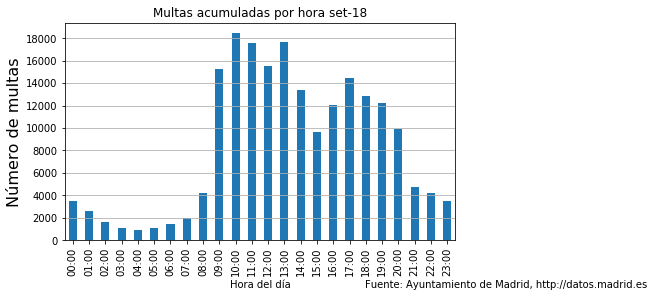

In [11]:
set18_hist=set18['hora_entera'].value_counts().sort_index(axis=0)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=set18_hist.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Número de multas',size=16)
ax.grid(axis='y')
ax.set_title('Multas acumuladas por hora set-18')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('multas_hora_sep18',bbox_inches = 'tight')

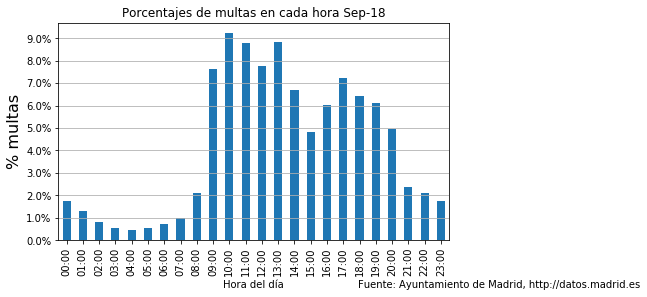

In [12]:
set18_hist_porcentaje=set18['hora_entera'].value_counts().sort_index(axis=0)/len(set18)*100
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=set18_hist_porcentaje.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('% multas',size=16)
ax.grid(axis='y')
ax.set_title('Porcentajes de multas en cada hora Sep-18')
fmt = '%3.1f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('set18_hora_porcentaje_sep18',bbox_inches = 'tight')

In [13]:
puntos_totales=set18.PUNTOS.sum()
print ('Puntos total perdidos: {:,.0f} puntos'.format(puntos_totales))

Puntos total perdidos: 23,524 puntos


In [14]:
euros_totales=set18.IMPORTE_MULTA.sum()
print ('Importe total de multas antes de descuento: {:,.0f} euros'.format(euros_totales))

Importe total de multas antes de descuento: 19,534,120 euros


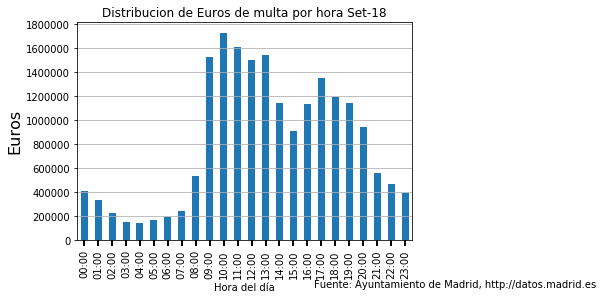

In [15]:
set18_euros=set18.sort_values('HORA').groupby("hora_entera",sort=False).IMPORTE_MULTA
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1 = set18_euros.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Euros',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(set18_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Euros de multa por hora Set-18')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('euros_hora',bbox_inches = 'tight')

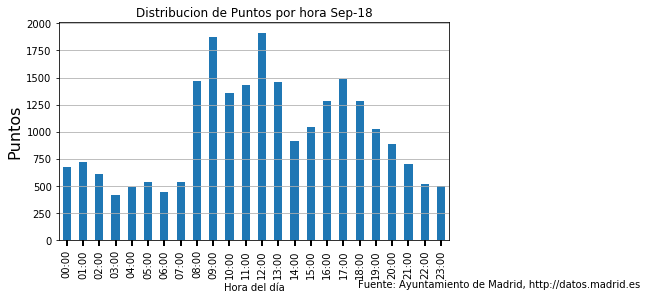

In [16]:
set18_puntos=set18.sort_values('HORA').groupby("hora_entera",sort=False).PUNTOS
fig1 = plt.figure(1,(7,4))
ax1 = fig1.add_subplot(1,1,1)
ax1 = set18_puntos.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Puntos',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(multas_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Puntos por hora Sep-18')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig1.savefig('puntos_hora_Sep18',bbox_inches = 'tight')

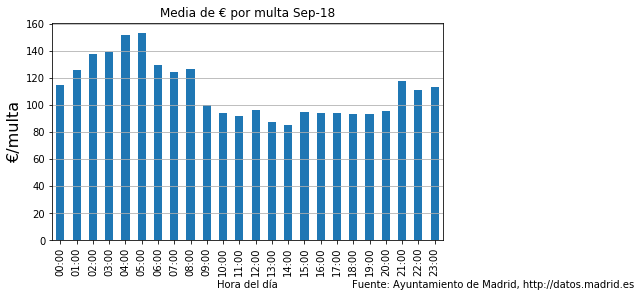

In [17]:
ratio_euros_set18=set18_euros.sum()/set18_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_euros_set18.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('€/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de € por multa Sep-18')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_euros_multa_Set18',bbox_inches = 'tight')

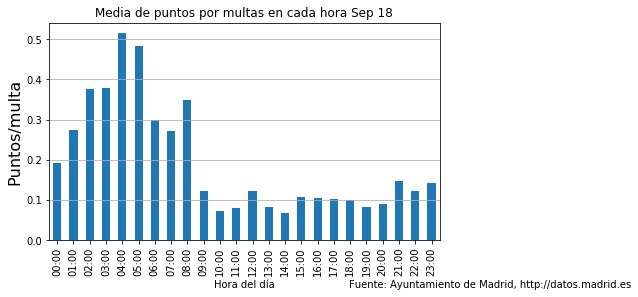

In [18]:
ratio_puntos_set18=set18_puntos.sum()/set18_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_puntos_set18.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Puntos/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de puntos por multas en cada hora Sep 18')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_puntos_multa_Sep18',bbox_inches = 'tight')

### 2.3.2 Octubre 2018

In [19]:
oct18 = pd.read_csv(path_web1018, sep=';', encoding='windows-1250', 
                    index_col=False, header=None,names=nombre_columnas1018,skiprows=1)

#### 2.3.2.1 Convertimos la variable 'hora' a string para modificarla a formato 'HH:00', reemplazamos el '.' por los ':' y convertimos los string a formato fecha-hora

In [20]:
oct18.HORA=oct18.HORA.apply(lambda i: str(i))
oct18.dtypes

GRAVEDAD                   object
DIRECCION                  object
MES                         int64
ANIO                        int64
HORA                       object
IMPORTE_MULTA             float64
DESCUENTO                  object
PUNTOS                      int64
DENUNCIANTE                object
DESCRIPCION_INFRACCION     object
VELOCIDAD_LIMITE           object
VELOCIDAD_CIRCULACION      object
COORDENADA_X               object
COORDENADA_Y               object
dtype: object

In [21]:
oct18['HORA']=oct18.HORA.apply(lambda i: i.replace('.',':'))
oct18.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,GRAVE,BENIMAMET 85,10,2018,10:2,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA OBSTACULIZANDO GRAVE...,,,,
1,LEVE,CL CASTILLA 26,10,2018,14:37,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,
2,GRAVE,MANUEL NOYA 23,10,2018,0:5,200.0,SI,4,POLICIA MUNICIPAL,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,,,
3,LEVE,CL DULCINEA 10,10,2018,10:23,30.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN EN LUGAR HABILITAD...,,,,
4,LEVE,PZ CONDESA DE GAVIA 3,10,2018,10:41,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO DEBIDAMENTE SEŃA...,,,,


In [22]:
oct18['HORA']=pd.to_datetime(oct18['HORA'],format='%H:%M')
oct18.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,GRAVE,BENIMAMET 85,10,2018,1900-01-01 10:02:00,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA OBSTACULIZANDO GRAVE...,,,,
1,LEVE,CL CASTILLA 26,10,2018,1900-01-01 14:37:00,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,
2,GRAVE,MANUEL NOYA 23,10,2018,1900-01-01 00:05:00,200.0,SI,4,POLICIA MUNICIPAL,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,,,
3,LEVE,CL DULCINEA 10,10,2018,1900-01-01 10:23:00,30.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN EN LUGAR HABILITAD...,,,,
4,LEVE,PZ CONDESA DE GAVIA 3,10,2018,1900-01-01 10:41:00,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO DEBIDAMENTE SEŃA...,,,,


In [23]:
for n in range(0,oct18.shape[0]):
    oct18.set_value(n,'hora_entera',oct18.loc[n,'HORA'].strftime('%H')+':00');

/Users/jaimecases/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [24]:
puntos_totales=oct18.PUNTOS.sum()
print ('Puntos total perdidos: {:,.0f} puntos'.format(puntos_totales))

Puntos total perdidos: 25,694 puntos


In [25]:
euros_totales=oct18.IMPORTE_MULTA.sum()

#### 2.3.2.2 Ploteamos distintos gráficos para el mes de octubre y averiguar las variables que nos interesan

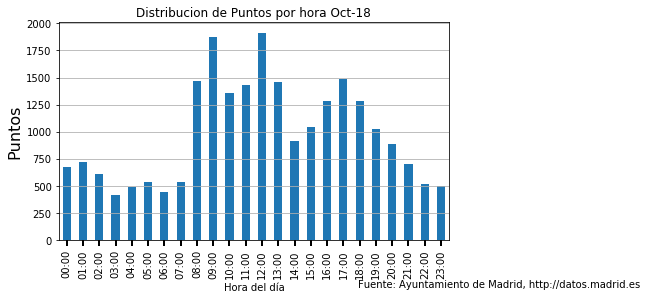

In [26]:
oct18_puntos=oct18.sort_values('HORA').groupby("hora_entera",sort=False).PUNTOS
fig1 = plt.figure(1,(7,4))
ax1 = fig1.add_subplot(1,1,1)
ax1 = set18_puntos.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Puntos',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(multas_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Puntos por hora Oct-18')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig1.savefig('puntos_hora_Oct18',bbox_inches = 'tight')

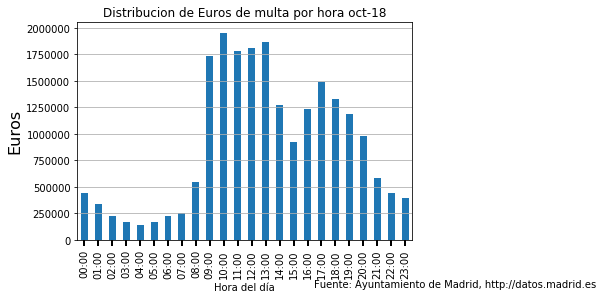

In [27]:
oct18_euros=oct18.sort_values('HORA').groupby('hora_entera',sort=False).IMPORTE_MULTA
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1 = oct18_euros.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Euros',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(oct18_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Euros de multa por hora oct-18')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('euros_hora',bbox_inches = 'tight')

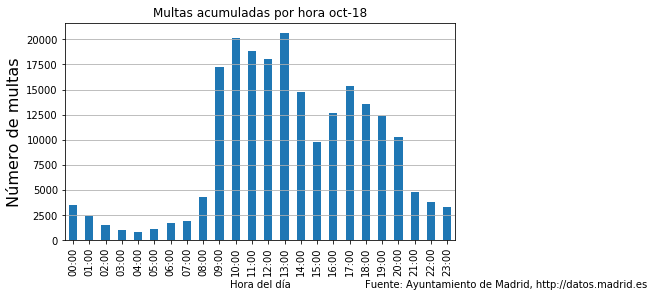

In [28]:
oct18_hist=oct18['hora_entera'].value_counts().sort_index(axis=0)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=oct18_hist.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Número de multas',size=16)
ax.grid(axis='y')
ax.set_title('Multas acumuladas por hora oct-18')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('multas_hora_oct18',bbox_inches = 'tight')

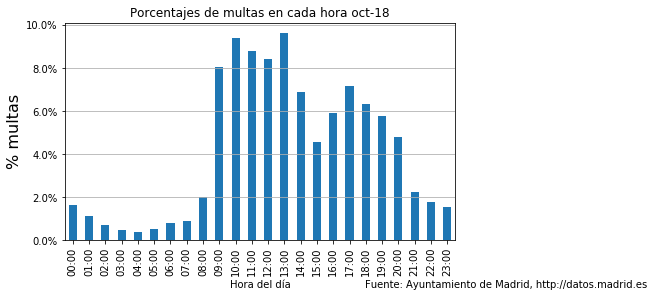

In [29]:
oct18_hist_porcentaje=oct18['hora_entera'].value_counts().sort_index(axis=0)/len(oct18)*100
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=oct18_hist_porcentaje.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('% multas',size=16)
ax.grid(axis='y')
ax.set_title('Porcentajes de multas en cada hora oct-18')
fmt = '%3.1f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('oct18_hora_porcentaje_oct18',bbox_inches = 'tight')

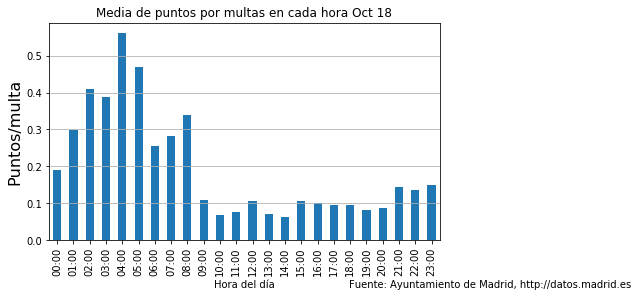

In [30]:
ratio_puntos_oct18=set18_puntos.sum()/oct18_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_puntos_oct18.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Puntos/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de puntos por multas en cada hora Oct 18')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_puntos_multa_Oct18',bbox_inches = 'tight')

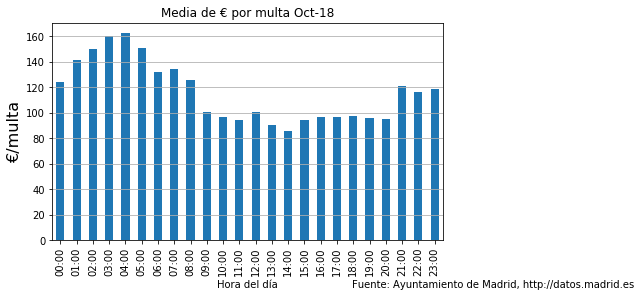

In [31]:
ratio_euros_oct18=oct18_euros.sum()/oct18_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_euros_oct18.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('€/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de € por multa Oct-18')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_euros_multa_Oct18',bbox_inches = 'tight')

### 2.3.3 Noviembre 2018

In [32]:
nov18 = pd.read_csv(path_web1118, sep=';', encoding='windows-1250', 
                    index_col=False, header=None,names=nombre_columnas1118,skiprows=1)

#### 2.3.3.1 Convertimos la variable 'hora' a string para modificarla a formato 'HH:00', reemplazamos el '.' por los ':' y convertimos los string a formato fecha-hora

In [33]:
nov18.HORA=nov18.HORA.apply(lambda i: str(i))
nov18.dtypes

GRAVEDAD                   object
DIRECCION                  object
MES                         int64
ANIO                        int64
HORA                       object
IMPORTE_MULTA             float64
DESCUENTO                  object
PUNTOS                      int64
DENUNCIANTE                object
DESCRIPCION_INFRACCION     object
VELOCIDAD_LIMITE           object
VELOCIDAD_CIRCULACION      object
COORDENADA_X               object
COORDENADA_Y               object
dtype: object

In [34]:
nov18['HORA']=nov18.HORA.apply(lambda i: i.replace('.',':'))
nov18.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,LEVE,CL NUMANCIA 32,11,2018,13:32,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,
1,LEVE,CL CAROLINAS 6,11,2018,14:24,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,
2,GRAVE,CL ORENSE 83,11,2018,13:02,200.0,SI,0,SER,ESTACIONAR EN DOBLE FILA. ...,,,,
3,LEVE,CL ORENSE 81,11,2018,13:04,90.0,SI,0,SER,ESTACIONAR EN CARRIL DECIRCULACIÓN. ...,,,,
4,GRAVE,VERDOLAGA 5,11,2018,13:3,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA OBSTACULIZANDO GRAVE...,,,,


In [35]:
nov18['HORA']=pd.to_datetime(nov18['HORA'],format='%H:%M')
nov18.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,LEVE,CL NUMANCIA 32,11,2018,1900-01-01 13:32:00,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,
1,LEVE,CL CAROLINAS 6,11,2018,1900-01-01 14:24:00,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,
2,GRAVE,CL ORENSE 83,11,2018,1900-01-01 13:02:00,200.0,SI,0,SER,ESTACIONAR EN DOBLE FILA. ...,,,,
3,LEVE,CL ORENSE 81,11,2018,1900-01-01 13:04:00,90.0,SI,0,SER,ESTACIONAR EN CARRIL DECIRCULACIÓN. ...,,,,
4,GRAVE,VERDOLAGA 5,11,2018,1900-01-01 13:03:00,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA OBSTACULIZANDO GRAVE...,,,,


In [36]:
for n in range(0,nov18.shape[0]):
    nov18.set_value(n,'hora_entera',nov18.loc[n,'HORA'].strftime('%H')+':00');

/Users/jaimecases/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [37]:
puntos_totales=nov18.PUNTOS.sum()
print ('Puntos total perdidos: {:,.0f} puntos'.format(puntos_totales))

Puntos total perdidos: 22,139 puntos


In [38]:
euros_totales=nov18.IMPORTE_MULTA.sum()

#### 2.3.3.2 Ploteamos distintos gráficos para el mes de noviembre y averiguar las variables que nos interesan

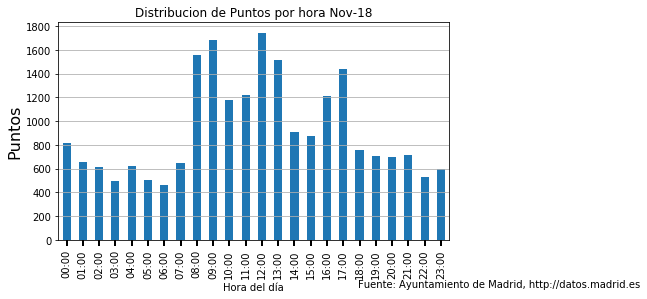

In [39]:
nov18_puntos=nov18.sort_values('HORA').groupby("hora_entera",sort=False).PUNTOS
fig1 = plt.figure(1,(7,4))
ax1 = fig1.add_subplot(1,1,1)
ax1 = nov18_puntos.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Puntos',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(multas_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Puntos por hora Nov-18')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig1.savefig('puntos_hora_Nov18',bbox_inches = 'tight')

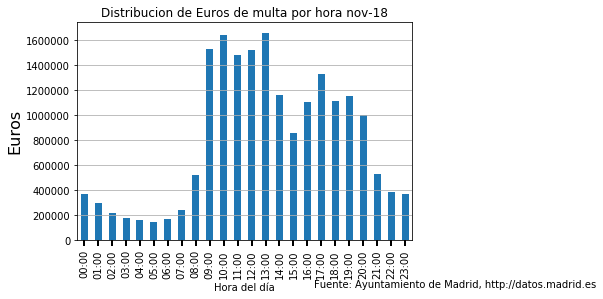

In [40]:
nov18_euros=nov18.sort_values('HORA').groupby('hora_entera',sort=False).IMPORTE_MULTA
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1 = nov18_euros.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Euros',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(nov18_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Euros de multa por hora nov-18')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('euros_hora',bbox_inches = 'tight')

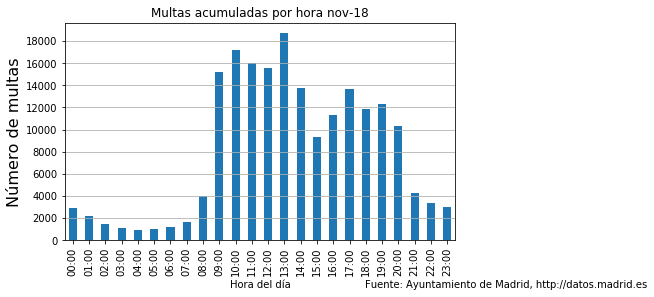

In [41]:
nov18_hist=nov18['hora_entera'].value_counts().sort_index(axis=0)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=nov18_hist.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Número de multas',size=16)
ax.grid(axis='y')
ax.set_title('Multas acumuladas por hora nov-18')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('multas_hora_nov18',bbox_inches = 'tight')

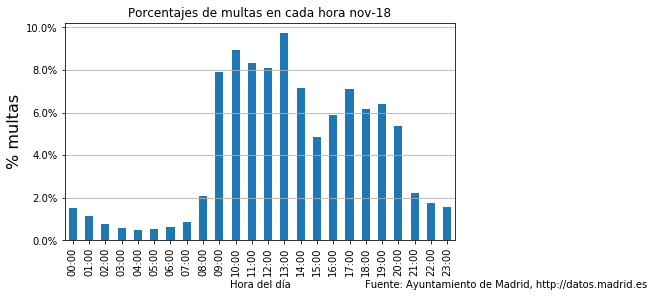

In [42]:
nov18_hist_porcentaje=nov18['hora_entera'].value_counts().sort_index(axis=0)/len(nov18)*100
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=nov18_hist_porcentaje.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('% multas',size=16)
ax.grid(axis='y')
ax.set_title('Porcentajes de multas en cada hora nov-18')
fmt = '%3.1f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('nov18_hora_porcentaje_nov18',bbox_inches = 'tight')

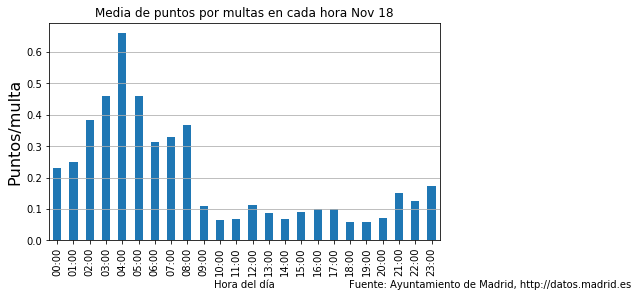

In [43]:
ratio_puntos_nov18=nov18_puntos.sum()/set18_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_puntos_nov18.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Puntos/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de puntos por multas en cada hora Nov 18')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_puntos_multa_Nov18',bbox_inches = 'tight')

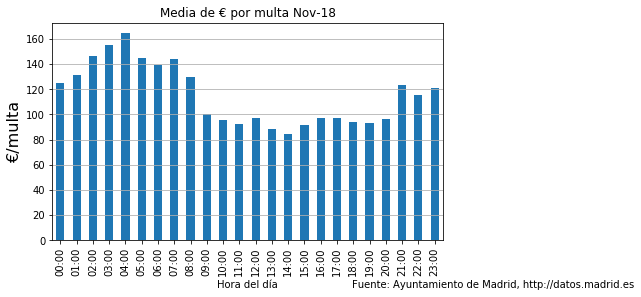

In [44]:
ratio_euros_nov18=nov18_euros.sum()/nov18_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_euros_nov18.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('€/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de € por multa Nov-18')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_euros_multa_Nov18',bbox_inches = 'tight')

## 3.1 Análisis de Otoño
### 3.1.1 Septiembre, octubre y noviembre

#### 3.1.1.1 Puntos
Como podemos observar durante los meses de otoño el número de multas con mayor acumulación en el día van de las 9:00 a las 13:00 horas, y de ahí a las 17:00 horas esto muy notorio, con lo que podemos mencionar es que las multas están dentro del horario laboral y podemos concluir que es debido a esta actividad de un trabajador de oficina. Así mismo está muy marcado en la distribución de puntos que en las horas de las 9:00 y las 12:00 es cuando existe una mayor cantidad de puntos puestos por infracción cometida. Es muy importante mencionar que las infracciones más graves se comentes en horarios que van de 2:00 a las 6:00 horas en las cuales podemos concluir que debido a la poca circulación de transito los automóviles tienden a faltar el respeto al reglamento de tránsito, cabe mencionar que también son horarios en la que las personas suelen estar saliendo de lugares de entretenimiento, ocio o esparcimiento.

#### 3.1.1.2 Euros
La mayor parte de las multas están situadas en la franja horaria entre las nueve de la mañana y la una del mediodía, concidiendo con la joranda laboral y, por tanto, momento en el que más circulación hay durante el día. Sin embargo, en este periodo de tiempo es donde se penalizan las infracciones lebes, y por tanto más baratas. Las multas más caras tienen lugar durante la noche, esto deber a que suelen ser las más graves: las multas relacionadas con alcoholemia. Pese a esto último, si nos fijamos en la distrución de euros de multa por hora, la franja en la que más se recauda más coincide con la franja en las que más multas hay. Una tendencia que se va a repetir durante todo el año.

### 2.3.4 Diciembre 2018

In [45]:
dic18 = pd.read_csv(path_web1218, sep=';', encoding='windows-1250', 
                    index_col=False, header=None,names=nombre_columnas1218,skiprows=1)

#### 2.3.4.1 Convertimos la variable 'hora' a string para modificarla a formato 'HH:00', reemplazamos el '.' por los ':' y convertimos los string a formato fecha-hora

In [46]:
dic18.HORA=dic18.HORA.apply(lambda i: str(i))
dic18.dtypes

GRAVEDAD                   object
DIRECCION                  object
MES                         int64
ANIO                        int64
HORA                       object
IMPORTE_MULTA             float64
DESCUENTO                  object
PUNTOS                      int64
DENUNCIANTE                object
DESCRIPCION_INFRACCION     object
VELOCIDAD_LIMITE           object
VELOCIDAD_CIRCULACION      object
COORDENADA_X               object
COORDENADA_Y               object
dtype: object

In [47]:
dic18['HORA']=dic18.HORA.apply(lambda i: i.replace('.',':'))
dic18.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,GRAVE,"M 30 KM 4,100 CALZADA 2",12,2018,8:49,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,83,,
1,GRAVE,"M 30 KM 1,600 CALZADA 2",12,2018,8:52,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,87,,
2,LEVE,CL REINA MERCEDES 24,12,2018,19:34,90.0,SI,0,SER,ESTACIONAR INCUMPLIENDOLAS RESTRICCIONES ESTAB...,,,,
3,LEVE,RAIMUNDO FDEZ VILLAVERDE 79,12,2018,13:3,90.0,SI,0,POLICIA MUNICIPAL,CIRCULAR POR UN CARRIL DE CIRCULACIÓN RESERVAD...,,,,
4,GRAVE,M 30 KM 26 CALZADA 2,12,2018,12:59,300.0,SI,2,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,106,,


In [48]:
dic18['HORA']=pd.to_datetime(dic18['HORA'],format='%H:%M')
dic18.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,GRAVE,"M 30 KM 4,100 CALZADA 2",12,2018,1900-01-01 08:49:00,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,83,,
1,GRAVE,"M 30 KM 1,600 CALZADA 2",12,2018,1900-01-01 08:52:00,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,87,,
2,LEVE,CL REINA MERCEDES 24,12,2018,1900-01-01 19:34:00,90.0,SI,0,SER,ESTACIONAR INCUMPLIENDOLAS RESTRICCIONES ESTAB...,,,,
3,LEVE,RAIMUNDO FDEZ VILLAVERDE 79,12,2018,1900-01-01 13:03:00,90.0,SI,0,POLICIA MUNICIPAL,CIRCULAR POR UN CARRIL DE CIRCULACIÓN RESERVAD...,,,,
4,GRAVE,M 30 KM 26 CALZADA 2,12,2018,1900-01-01 12:59:00,300.0,SI,2,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,106,,


In [49]:
for n in range(0,dic18.shape[0]):
    dic18.set_value(n,'hora_entera',dic18.loc[n,'HORA'].strftime('%H')+':00');

/Users/jaimecases/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [50]:
puntos_totales=dic18.PUNTOS.sum()
print ('Puntos total perdidos: {:,.0f} puntos'.format(puntos_totales))

Puntos total perdidos: 21,200 puntos


In [51]:
euros_totales=dic18.IMPORTE_MULTA.sum()

#### 2.3.4.2 Ploteamos distintos gráficos para el mes de diciembre y averiguar las variables que nos interesan

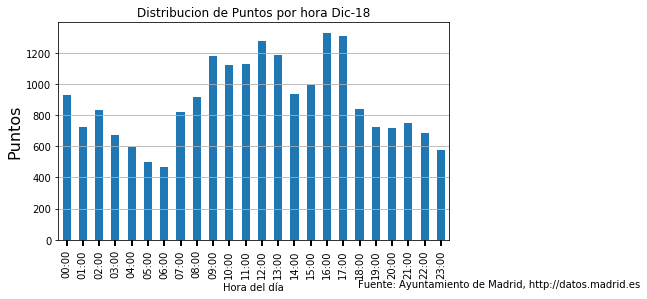

In [52]:
dic18_puntos=dic18.sort_values('HORA').groupby("hora_entera",sort=False).PUNTOS
fig1 = plt.figure(1,(7,4))
ax1 = fig1.add_subplot(1,1,1)
ax1 = dic18_puntos.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Puntos',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(multas_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Puntos por hora Dic-18')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig1.savefig('puntos_hora_Sep18',bbox_inches = 'tight')

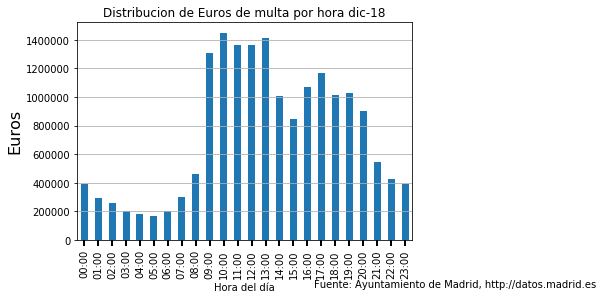

In [53]:
dic18_euros=dic18.sort_values('HORA').groupby('hora_entera',sort=False).IMPORTE_MULTA
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1 = dic18_euros.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Euros',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(dic18_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Euros de multa por hora dic-18')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('euros_hora',bbox_inches = 'tight')

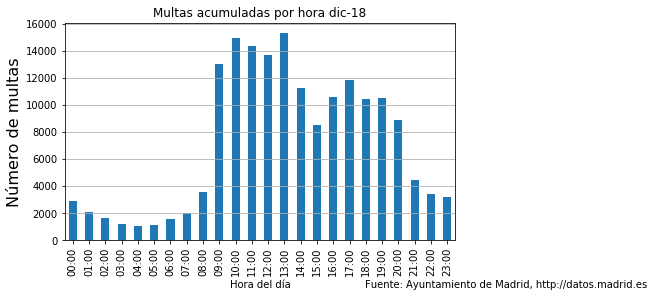

In [54]:
dic18_hist=dic18['hora_entera'].value_counts().sort_index(axis=0)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=dic18_hist.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Número de multas',size=16)
ax.grid(axis='y')
ax.set_title('Multas acumuladas por hora dic-18')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('multas_hora_dic18',bbox_inches = 'tight')

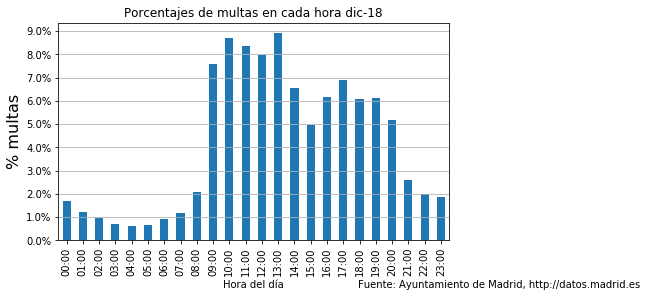

In [55]:
dic18_hist_porcentaje=dic18['hora_entera'].value_counts().sort_index(axis=0)/len(dic18)*100
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=dic18_hist_porcentaje.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('% multas',size=16)
ax.grid(axis='y')
ax.set_title('Porcentajes de multas en cada hora dic-18')
fmt = '%3.1f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('dic18_hora_porcentaje_dic18',bbox_inches = 'tight')

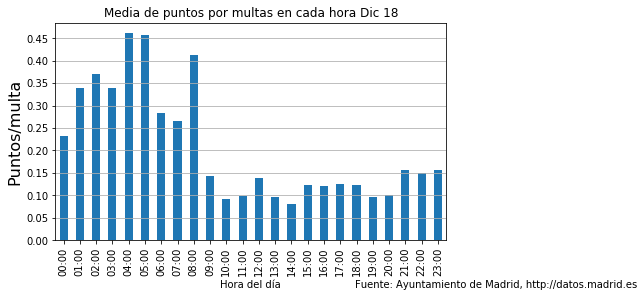

In [56]:
ratio_puntos_dic18=set18_puntos.sum()/dic18_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_puntos_dic18.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Puntos/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de puntos por multas en cada hora Dic 18')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_puntos_multa_Dic18',bbox_inches = 'tight')

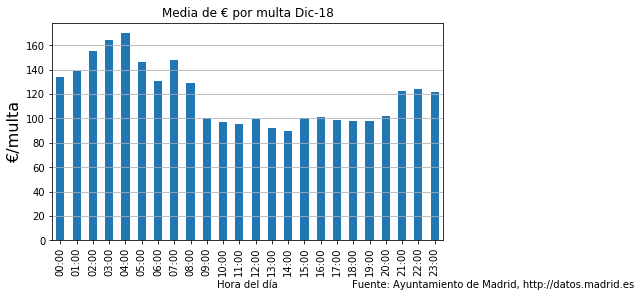

In [57]:
ratio_euros_dic18=dic18_euros.sum()/dic18_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_euros_dic18.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('€/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de € por multa Dic-18')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_euros_multa_Dic18',bbox_inches = 'tight')

### 2.5.1 Enero 2019

In [58]:
ene19 = pd.read_csv(path_web0119, sep=';', encoding='windows-1250', 
                    index_col=False, header=None,names=nombre_columnas0119,skiprows=1)

#### 2.3.5.1 Convertimos la variable 'hora' a string para modificarla a formato 'HH:00', reemplazamos el '.' por los ':' y convertimos los string a formato fecha-hora

In [59]:
ene19.HORA=ene19.HORA.apply(lambda i: str(i))
ene19.dtypes

GRAVEDAD                   object
DIRECCION                  object
MES                         int64
ANIO                        int64
HORA                       object
IMPORTE_MULTA             float64
DESCUENTO                  object
PUNTOS                      int64
DENUNCIANTE                object
DESCRIPCION_INFRACCION     object
VELOCIDAD_LIMITE           object
VELOCIDAD_CIRCULACION      object
COORDENADA_X               object
COORDENADA_Y               object
dtype: object

In [60]:
ene19['HORA']=ene19.HORA.apply(lambda i: i.replace('.',':'))
ene19.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,LEVE,SAN RESTITUTO 24,1,2019,16:12,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,
1,LEVE,LOMBIA-JORGE JUAN,1,2019,17:35,60.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR MOTOCICLETA O CICLOMOTOR SOBRE LA A...,,,,
2,LEVE,CL MULLER 36,1,2019,10:47,90.0,SI,0,SER,ESTACIONAR SOBRE LA ACERA. ...,,,,
3,LEVE,SANTA ISABEL 31,1,2019,1:15,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR RESERVADO TEMPORALMENTE PA...,,,,
4,GRAVE,CAUNEDO 27,1,2019,9:4,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN ZONA SEŃALIZADA PARA USO EXCLUSI...,,,,


In [61]:
ene19['HORA']=pd.to_datetime(ene19['HORA'],format='%H:%M')
ene19.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,LEVE,SAN RESTITUTO 24,1,2019,1900-01-01 16:12:00,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,
1,LEVE,LOMBIA-JORGE JUAN,1,2019,1900-01-01 17:35:00,60.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR MOTOCICLETA O CICLOMOTOR SOBRE LA A...,,,,
2,LEVE,CL MULLER 36,1,2019,1900-01-01 10:47:00,90.0,SI,0,SER,ESTACIONAR SOBRE LA ACERA. ...,,,,
3,LEVE,SANTA ISABEL 31,1,2019,1900-01-01 01:15:00,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR RESERVADO TEMPORALMENTE PA...,,,,
4,GRAVE,CAUNEDO 27,1,2019,1900-01-01 09:04:00,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN ZONA SEŃALIZADA PARA USO EXCLUSI...,,,,


In [62]:
for n in range(0,ene19.shape[0]):
    ene19.set_value(n,'hora_entera',ene19.loc[n,'HORA'].strftime('%H')+':00');

/Users/jaimecases/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [63]:
puntos_totales=ene19.PUNTOS.sum()
print ('Puntos total perdidos: {:,.0f} puntos'.format(puntos_totales))

Puntos total perdidos: 19,476 puntos


In [64]:
euros_totales=ene19.IMPORTE_MULTA.sum()

#### 2.3.5.2 Ploteamos distintos gráficos para el mes de enero y averiguar las variables que nos interesan

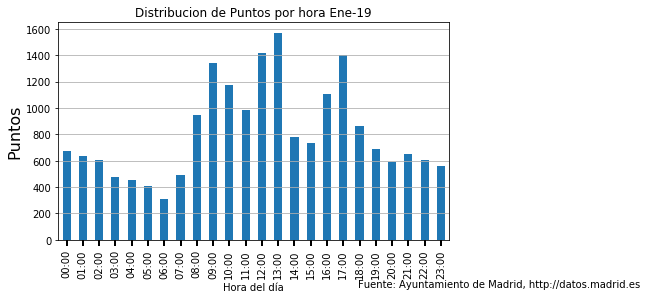

In [65]:
ene19_puntos=ene19.sort_values('HORA').groupby("hora_entera",sort=False).PUNTOS
fig1 = plt.figure(1,(7,4))
ax1 = fig1.add_subplot(1,1,1)
ax1 = ene19_puntos.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Puntos',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(multas_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Puntos por hora Ene-19')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig1.savefig('puntos_hora_Ene19',bbox_inches = 'tight')

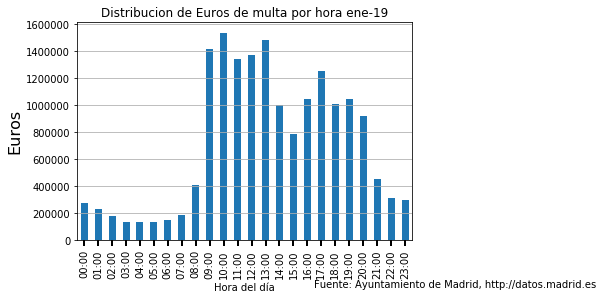

In [66]:
ene19_euros=ene19.sort_values('HORA').groupby('hora_entera',sort=False).IMPORTE_MULTA
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1 = ene19_euros.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Euros',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(ene19_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Euros de multa por hora ene-19')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('euros_hora',bbox_inches = 'tight')

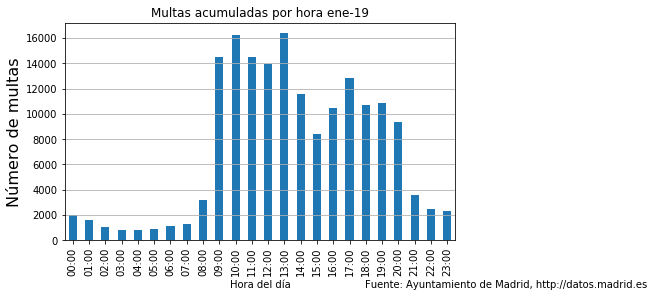

In [67]:
ene19_hist=ene19['hora_entera'].value_counts().sort_index(axis=0)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ene19_hist.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Número de multas',size=16)
ax.grid(axis='y')
ax.set_title('Multas acumuladas por hora ene-19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('multas_hora_ene19',bbox_inches = 'tight')

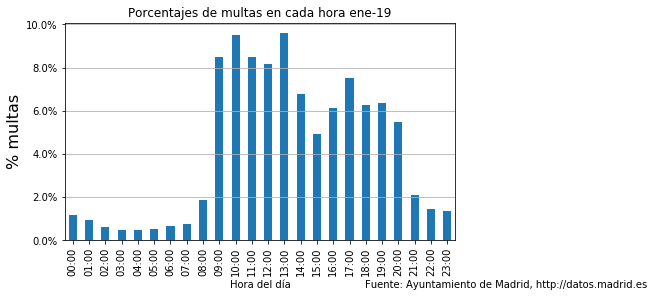

In [68]:
ene19_hist_porcentaje=ene19['hora_entera'].value_counts().sort_index(axis=0)/len(ene19)*100
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ene19_hist_porcentaje.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('% multas',size=16)
ax.grid(axis='y')
ax.set_title('Porcentajes de multas en cada hora ene-19')
fmt = '%3.1f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('ene19_hora_porcentaje_ene19',bbox_inches = 'tight')

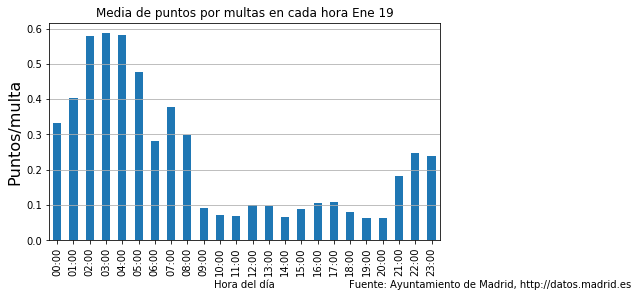

In [69]:
ratio_puntos_ene19=ene19_puntos.sum()/ene19_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_puntos_ene19.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Puntos/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de puntos por multas en cada hora Ene 19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_puntos_multa_Ene19',bbox_inches = 'tight')

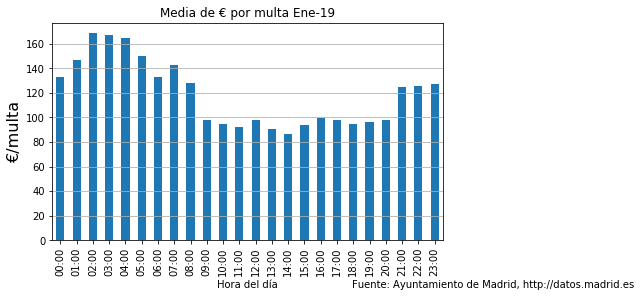

In [70]:
ratio_euros_ene19=ene19_euros.sum()/ene19_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_euros_ene19.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('€/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de € por multa Ene-19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_euros_multa_Ene19',bbox_inches = 'tight')

### 2.6.1 Febrero 2019

In [71]:
feb19 = pd.read_csv(path_web0219, sep=';', encoding='windows-1250', 
                    index_col=False, header=None,names=nombre_columnas0219,skiprows=1)

#### 2.3.6.1 Convertimos la variable 'hora' a string para modificarla a formato 'HH:00', reemplazamos el '.' por los ':' y convertimos los string a formato fecha-hora

In [72]:
feb19.HORA=feb19.HORA.apply(lambda i: str(i))
feb19.dtypes

GRAVEDAD                   object
DIRECCION                  object
MES                         int64
ANIO                        int64
HORA                       object
IMPORTE_MULTA             float64
DESCUENTO                  object
PUNTOS                      int64
DENUNCIANTE                object
DESCRIPCION_INFRACCION     object
VELOCIDAD_LIMITE           object
VELOCIDAD_CIRCULACION      object
COORDENADA_X               object
COORDENADA_Y               object
dtype: object

In [73]:
feb19['HORA']=feb19.HORA.apply(lambda i: i.replace('.',':'))
feb19.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,GRAVE,FTE CARRANTONA ESQ HAC.PAVONES,2,2019,9:04,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,,,
1,LEVE,CL NUMANCIA 12,2,2019,13:17,30.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN EN LUGAR HABILITAD...,,,,
2,GRAVE,SINESIO DELGADO GTA P. CEBRERO,2,2019,9:46,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,,,
3,GRAVE,VIA LUSITANA - PL ELIPTICA,2,2019,14:03,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,,439132.53,4470910.90
4,GRAVE,VIA LUSITANA - PL ELIPTICA,2,2019,16:41,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,,439132.53,4470910.90


In [74]:
feb19['HORA']=pd.to_datetime(feb19['HORA'],format='%H:%M')
feb19.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,GRAVE,FTE CARRANTONA ESQ HAC.PAVONES,2,2019,1900-01-01 09:04:00,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,,,
1,LEVE,CL NUMANCIA 12,2,2019,1900-01-01 13:17:00,30.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN EN LUGAR HABILITAD...,,,,
2,GRAVE,SINESIO DELGADO GTA P. CEBRERO,2,2019,1900-01-01 09:46:00,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,,,
3,GRAVE,VIA LUSITANA - PL ELIPTICA,2,2019,1900-01-01 14:03:00,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,,439132.53,4470910.90
4,GRAVE,VIA LUSITANA - PL ELIPTICA,2,2019,1900-01-01 16:41:00,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,,439132.53,4470910.90


In [75]:
for n in range(0,feb19.shape[0]):
    feb19.set_value(n,'hora_entera',feb19.loc[n,'HORA'].strftime('%H')+':00');

/Users/jaimecases/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [76]:
puntos_totales=feb19.PUNTOS.sum()
print ('Puntos total perdidos: {:,.0f} puntos'.format(puntos_totales))

Puntos total perdidos: 20,732 puntos


In [77]:
euros_totales=feb19.IMPORTE_MULTA.sum()

#### 2.3.6.2 Ploteamos distintos gráficos para el mes de febrero y averiguar las variables que nos interesan

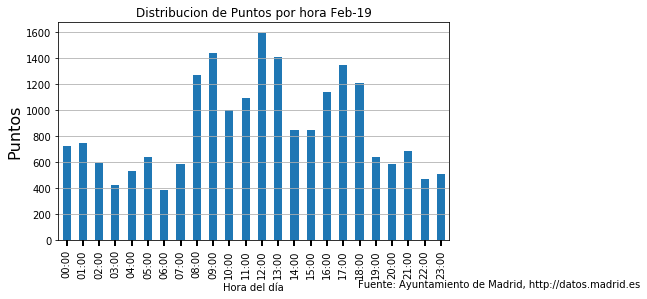

In [78]:
feb19_puntos=feb19.sort_values('HORA').groupby("hora_entera",sort=False).PUNTOS
fig1 = plt.figure(1,(7,4))
ax1 = fig1.add_subplot(1,1,1)
ax1 = feb19_puntos.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Puntos',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(multas_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Puntos por hora Feb-19')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig1.savefig('puntos_hora_Feb19',bbox_inches = 'tight')

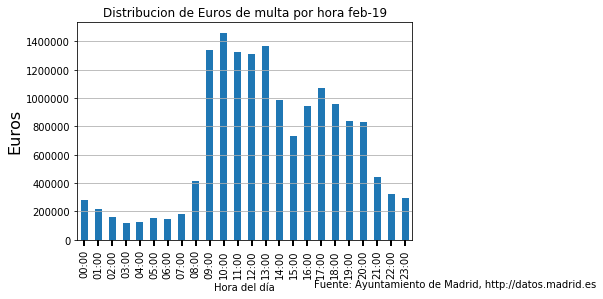

In [79]:
feb19_euros=feb19.sort_values('HORA').groupby('hora_entera',sort=False).IMPORTE_MULTA
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1 = feb19_euros.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Euros',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(feb19_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Euros de multa por hora feb-19')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('euros_hora',bbox_inches = 'tight')

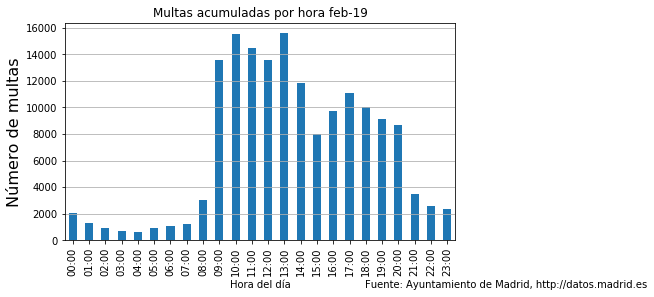

In [80]:
feb19_hist=feb19['hora_entera'].value_counts().sort_index(axis=0)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=feb19_hist.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Número de multas',size=16)
ax.grid(axis='y')
ax.set_title('Multas acumuladas por hora feb-19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('multas_hora_feb19',bbox_inches = 'tight')

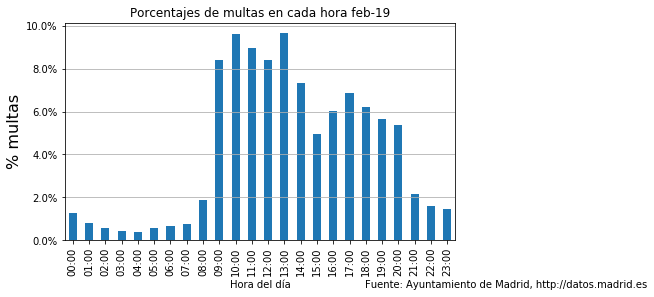

In [81]:
feb19_hist_porcentaje=feb19['hora_entera'].value_counts().sort_index(axis=0)/len(feb19)*100
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=feb19_hist_porcentaje.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('% multas',size=16)
ax.grid(axis='y')
ax.set_title('Porcentajes de multas en cada hora feb-19')
fmt = '%3.1f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('feb19_hora_porcentaje_feb19',bbox_inches = 'tight')

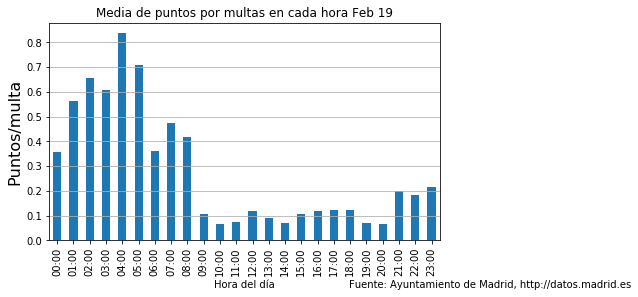

In [82]:
ratio_puntos_feb19=feb19_puntos.sum()/feb19_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_puntos_feb19.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Puntos/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de puntos por multas en cada hora Feb 19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_puntos_multa_Feb18',bbox_inches = 'tight')

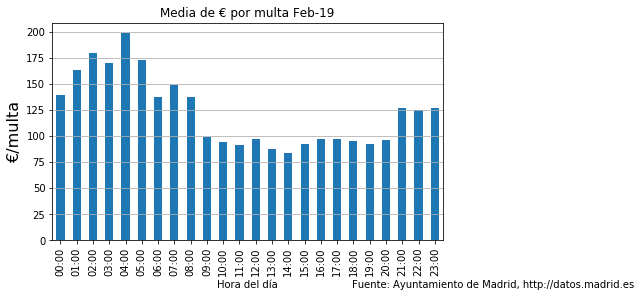

In [83]:
ratio_euros_feb19=feb19_euros.sum()/feb19_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_euros_feb19.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('€/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de € por multa Feb-19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_euros_multa_Feb19',bbox_inches = 'tight')

## 3.2 Invierno
### 3.2.1 Diciembre, enero y febrero

#### 3.2.1.1 Puntos

Como podemos observar durante los meses de inviero en comparacion con octubre no varia mucho con respecto a la acumulación del número de multas con mayor infracción en el día van que las 9:00 a las 13:00 horas, teniendo como pico principal el horario de 10:00 horas y de ahí a las 17:00 horas retoma una marcada acumulación, con lo que podemos mencionar al igual que en otoño es que las multas están dentro del horario laboral y podemos concluir que es debido a esta actividad de un trabajador de oficina. Así mismo está muy marcado en la distribución de puntos que en las horas de las 9:00 y las 12:00 es cuando existe una mayor cantidad de puntos puestos por infracción cometida. Es muy importante mencionar que las infracciones más graves se comenten en horarios cambia en este periodo ya que se ve una distribucion de acumulacion mayor a las 4:00 y 5:00 horas en las cuales podemos concluir que debido a la epoca de festividades tienden a faltar el respeto al reglamento de tránsito, cabe mencionar que también son horarios en la que las personas suelen estar saliendode lugares de entretenimiento, ocio o esparcimiento.

#### 3.2.1.2 Euros

Como a largo de todo el año, las mayor parte de multas se concentran en una franja horaria muy similar: entre las nueve de la mañana y la una del mediodía, concidiendo con la joranda laboral y, por tanto, momento en el que más circulación hay durante el día. Sin embargo, en estos meses, fijándonos en  esta franja horaria vemos que el porcentaje de multras supone el 10% en algunas horas, mientras que el porcentaje más alto por hora en verano está en torno al 8%. Las multas más caras continúan siendo durante la noche, esto quiere decir que se producen las infracciones más graves: las multas relacionadas con alcoholemia. Pese a esto último, si nos fijamos en la distrución de euros de multa por hora, la franja en la que se recauda más coincide con la franja en las que más multas hay.

### 2.7.1 Marzo 2019

In [84]:
mar19 = pd.read_csv(path_web0319, sep=';', encoding='windows-1250', 
                    index_col=False, header=None,names=nombre_columnas0319,skiprows=1)

#### 2.7.1.1 Convertimos la variable 'hora' a string para modificarla a formato 'HH:00', reemplazamos el '.' por los ':' y convertimos los string a formato fecha-hora

In [85]:
mar19.HORA=mar19.HORA.apply(lambda i: str(i))
mar19.dtypes

GRAVEDAD                   object
DIRECCION                  object
MES                         int64
ANIO                        int64
HORA                       object
IMPORTE_MULTA             float64
DESCUENTO                  object
PUNTOS                      int64
DENUNCIANTE                object
DESCRIPCION_INFRACCION     object
VELOCIDAD_LIMITE           object
VELOCIDAD_CIRCULACION      object
COORDENADA_X               object
COORDENADA_Y               object
dtype: object

In [86]:
mar19['HORA']=mar19.HORA.apply(lambda i: i.replace('.',':'))
mar19.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,LEVE,AEROPUERTO SALIDA T 1,3,2019,12:3,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,
1,LEVE,AEROPUERTO SALIDA T 1,3,2019,12:3,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,
2,LEVE,AEROPUERTO SALIDA T 1,3,2019,12:3,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,
3,LEVE,PZ JOSE DE VILLARREAL,3,2019,12:15,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA. ...,,,,
4,GRAVE,HERMINIO PUERTAS 50,3,2019,20:33,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN ZONA SEŃALIZADA PARA USO EXCLUSI...,,,,


In [87]:
mar19['HORA']=pd.to_datetime(mar19['HORA'],format='%H:%M')
mar19.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,LEVE,AEROPUERTO SALIDA T 1,3,2019,1900-01-01 12:03:00,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,
1,LEVE,AEROPUERTO SALIDA T 1,3,2019,1900-01-01 12:03:00,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,
2,LEVE,AEROPUERTO SALIDA T 1,3,2019,1900-01-01 12:03:00,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,
3,LEVE,PZ JOSE DE VILLARREAL,3,2019,1900-01-01 12:15:00,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA. ...,,,,
4,GRAVE,HERMINIO PUERTAS 50,3,2019,1900-01-01 20:33:00,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN ZONA SEŃALIZADA PARA USO EXCLUSI...,,,,


In [88]:
for n in range(0,mar19.shape[0]):
    mar19.set_value(n,'hora_entera',mar19.loc[n,'HORA'].strftime('%H')+':00');

/Users/jaimecases/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [89]:
puntos_totales=mar19.PUNTOS.sum()
print ('Puntos total perdidos: {:,.0f} puntos'.format(puntos_totales))

Puntos total perdidos: 21,502 puntos


In [90]:
euros_totales=mar19.IMPORTE_MULTA.sum()

#### 2.3.7.2 Ploteamos distintos gráficos para el mes de marzo y averiguar las variables que nos interesan

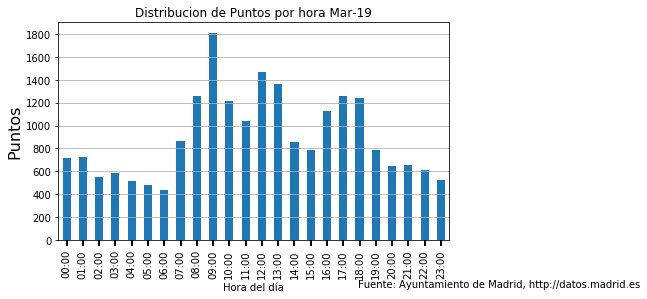

In [91]:
mar19_puntos=mar19.sort_values('HORA').groupby("hora_entera",sort=False).PUNTOS
fig1 = plt.figure(1,(7,4))
ax1 = fig1.add_subplot(1,1,1)
ax1 = mar19_puntos.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Puntos',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(multas_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Puntos por hora Mar-19')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig1.savefig('puntos_hora_Mar19',bbox_inches = 'tight')

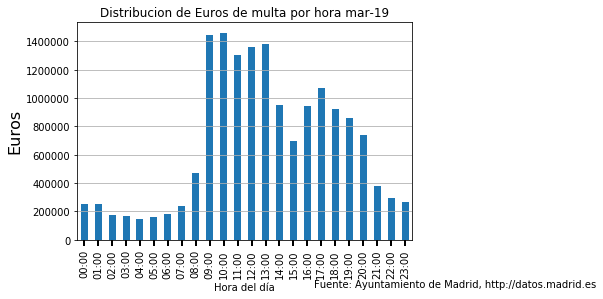

In [92]:
mar19_euros=mar19.sort_values('HORA').groupby('hora_entera',sort=False).IMPORTE_MULTA
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1 = mar19_euros.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Euros',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(mar19_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Euros de multa por hora mar-19')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('euros_hora',bbox_inches = 'tight')

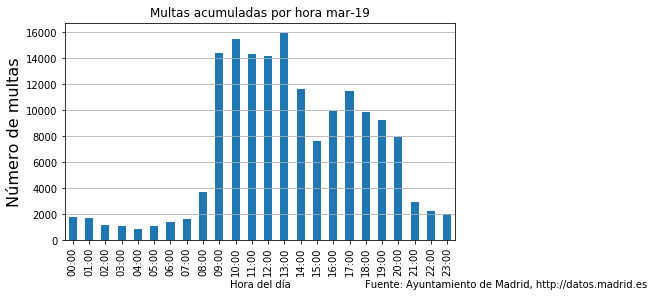

In [93]:
mar19_hist=mar19['hora_entera'].value_counts().sort_index(axis=0)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=mar19_hist.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Número de multas',size=16)
ax.grid(axis='y')
ax.set_title('Multas acumuladas por hora mar-19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('multas_hora_mar19',bbox_inches = 'tight')

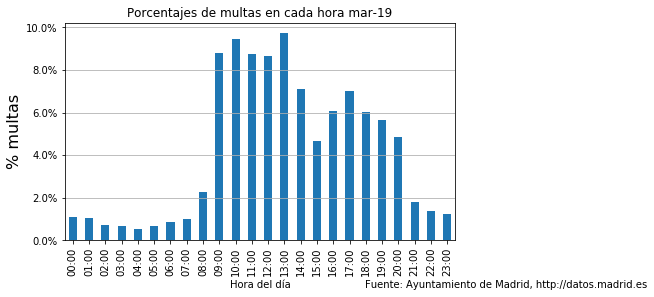

In [94]:
mar19_hist_porcentaje=mar19['hora_entera'].value_counts().sort_index(axis=0)/len(mar19)*100
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=mar19_hist_porcentaje.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('% multas',size=16)
ax.grid(axis='y')
ax.set_title('Porcentajes de multas en cada hora mar-19')
fmt = '%3.1f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('mar19_hora_porcentaje_mar19',bbox_inches = 'tight')

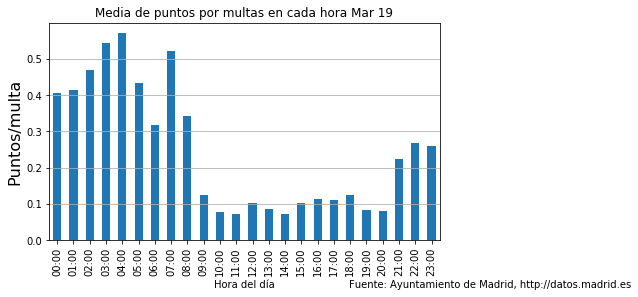

In [95]:
ratio_puntos_mar19=mar19_puntos.sum()/mar19_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_puntos_mar19.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Puntos/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de puntos por multas en cada hora Mar 19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_puntos_multa_Mar19',bbox_inches = 'tight')

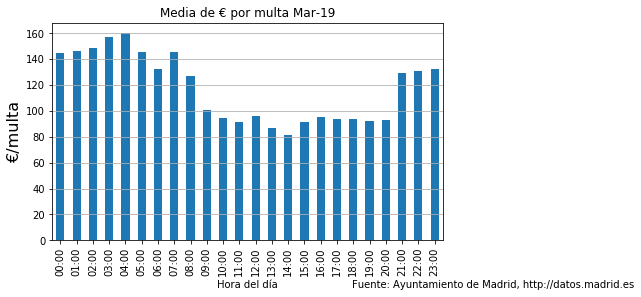

In [96]:
ratio_euros_mar19=mar19_euros.sum()/mar19_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_euros_mar19.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('€/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de € por multa Mar-19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_euros_multa_Mar19',bbox_inches = 'tight')

### 2.8.1 Abril 2019

In [97]:
abr19 = pd.read_csv(path_web0419, sep=';', encoding='windows-1250', 
                    index_col=False, header=None,names=nombre_columnas0419,skiprows=1)

#### 2.8.1.1 Convertimos la variable 'hora' a string para modificarla a formato 'HH:00', reemplazamos el '.' por los ':' y convertimos los string a formato fecha-hora

In [98]:
abr19.HORA=abr19.HORA.apply(lambda i: str(i))
abr19.dtypes

GRAVEDAD                   object
DIRECCION                  object
MES                         int64
ANIO                        int64
HORA                       object
IMPORTE_MULTA             float64
DESCUENTO                  object
PUNTOS                      int64
DENUNCIANTE                object
DESCRIPCION_INFRACCION     object
VELOCIDAD_LIMITE           object
VELOCIDAD_CIRCULACION      object
COORDENADA_X               object
COORDENADA_Y               object
dtype: object

In [99]:
abr19['HORA']=abr19.HORA.apply(lambda i: i.replace('.',':'))
abr19.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,LEVE,CL P. JUSTO DORADO DELLMANS 4,4,2019,14:55,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
1,LEVE,CL JUAN ESPLANDIU 13,4,2019,14:26,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,
2,LEVE,PZ ANGEL CARBAJO 4,4,2019,13:22,90.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACIÓN. ...,,,,
3,LEVE,CL ALONSO CANO 18,4,2019,9:3,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,
4,LEVE,CL BRETON DE LOS HERREROS 12,4,2019,9:2,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,


In [100]:
abr19['HORA']=pd.to_datetime(abr19['HORA'],format='%H:%M')
abr19.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,LEVE,CL P. JUSTO DORADO DELLMANS 4,4,2019,1900-01-01 14:55:00,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
1,LEVE,CL JUAN ESPLANDIU 13,4,2019,1900-01-01 14:26:00,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,
2,LEVE,PZ ANGEL CARBAJO 4,4,2019,1900-01-01 13:22:00,90.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACIÓN. ...,,,,
3,LEVE,CL ALONSO CANO 18,4,2019,1900-01-01 09:03:00,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,
4,LEVE,CL BRETON DE LOS HERREROS 12,4,2019,1900-01-01 09:02:00,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,


In [101]:
for n in range(0,abr19.shape[0]):
    abr19.set_value(n,'hora_entera',abr19.loc[n,'HORA'].strftime('%H')+':00');

/Users/jaimecases/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [102]:
puntos_totales=abr19.PUNTOS.sum()
print ('Puntos total perdidos: {:,.0f} puntos'.format(puntos_totales))

Puntos total perdidos: 20,419 puntos


In [103]:
euros_totales=abr19.IMPORTE_MULTA.sum()

#### 2.8.1.2 Ploteamos distintos gráficos para el mes de abril y averiguar las variables que nos interesan

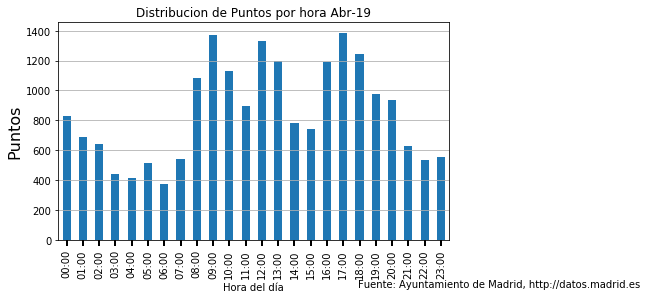

In [104]:
abr19_puntos=abr19.sort_values('HORA').groupby("hora_entera",sort=False).PUNTOS
fig1 = plt.figure(1,(7,4))
ax1 = fig1.add_subplot(1,1,1)
ax1 = abr19_puntos.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Puntos',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(multas_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Puntos por hora Abr-19')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig1.savefig('puntos_hora_Abr19',bbox_inches = 'tight')

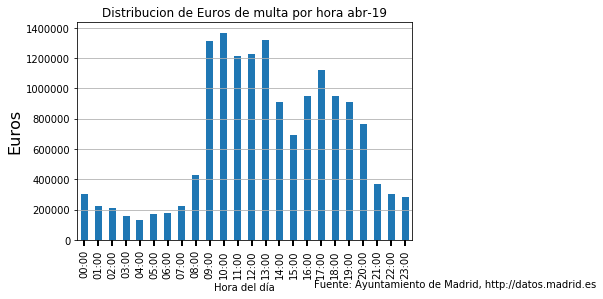

In [105]:
abr19_euros=abr19.sort_values('HORA').groupby('hora_entera',sort=False).IMPORTE_MULTA
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1 = abr19_euros.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Euros',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(abr19_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Euros de multa por hora abr-19')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('euros_hora',bbox_inches = 'tight')

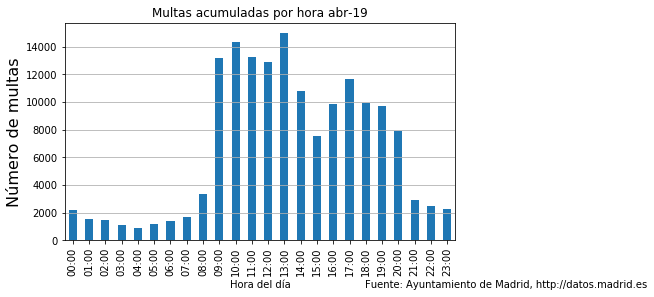

In [106]:
abr19_hist=abr19['hora_entera'].value_counts().sort_index(axis=0)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=abr19_hist.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Número de multas',size=16)
ax.grid(axis='y')
ax.set_title('Multas acumuladas por hora abr-19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('multas_hora_abr19',bbox_inches = 'tight')

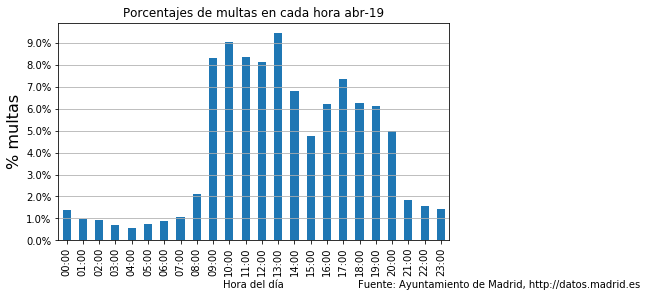

In [107]:
abr19_hist_porcentaje=abr19['hora_entera'].value_counts().sort_index(axis=0)/len(abr19)*100
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=abr19_hist_porcentaje.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('% multas',size=16)
ax.grid(axis='y')
ax.set_title('Porcentajes de multas en cada hora abr-19')
fmt = '%3.1f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('abr19_hora_porcentaje_abr19',bbox_inches = 'tight')

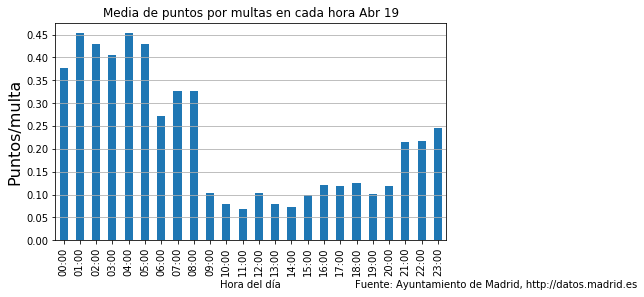

In [108]:
ratio_puntos_abr19=abr19_puntos.sum()/abr19_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_puntos_abr19.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Puntos/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de puntos por multas en cada hora Abr 19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_puntos_multa_Abr19',bbox_inches = 'tight')

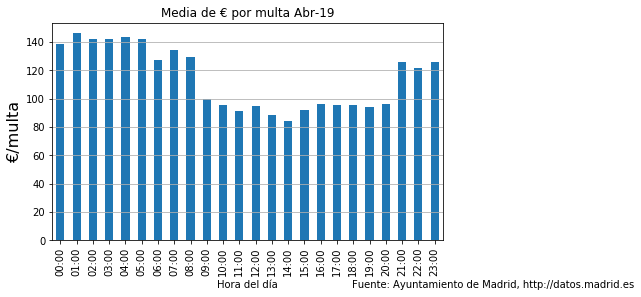

In [109]:
ratio_euros_abr19=abr19_euros.sum()/abr19_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_euros_abr19.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('€/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de € por multa Abr-19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_euros_multa_Abr19',bbox_inches = 'tight')

### 2.9.1 Mayo 2019

In [110]:
may19 = pd.read_csv(path_web0519, sep=';', encoding='windows-1250', 
                    index_col=False, header=None,names=nombre_columnas0519,skiprows=1)

#### 2.9.1.1 Convertimos la variable 'hora' a string para modificarla a formato 'HH:00', reemplazamos el '.' por los ':' y convertimos los string a formato fecha-hora

In [111]:
may19.HORA=may19.HORA.apply(lambda i: str(i))
may19.dtypes

GRAVEDAD                   object
DIRECCION                  object
MES                         int64
ANIO                        int64
HORA                       object
IMPORTE_MULTA             float64
DESCUENTO                  object
PUNTOS                      int64
DENUNCIANTE                object
DESCRIPCION_INFRACCION     object
VELOCIDAD_LIMITE           object
VELOCIDAD_CIRCULACION      object
COORDENADA_X               object
COORDENADA_Y               object
dtype: object

In [112]:
may19['HORA']=may19.HORA.apply(lambda i: i.replace('.',':'))
may19.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,GRAVE,ARROYO VALDECELADA,5,2019,19:1,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN CARRIL DECIRCULACIÓN OBSTACULIZA...,,,,
1,GRAVE,ALESANCO-SANCHEZ PRECIADO,5,2019,11:0,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN CARRIL DECIRCULACIÓN OBSTACULIZA...,,,,
2,LEVE,ALESANCO-SANCHEZ PRECIADO,5,2019,11:01,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN CARRIL DE CIRCULACIÓN. ...,,,,
3,GRAVE,QUINTANA 26,5,2019,13:0,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR OBSTACULIZANDO LA UTILIZACIÓN DE UN...,,,,
4,GRAVE,FRANCOS RODRIGUEZ,5,2019,14:27,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA OBSTACULIZANDO GRAVE...,,,,


In [113]:
may19['HORA']=pd.to_datetime(may19['HORA'],format='%H:%M')
may19.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,GRAVE,ARROYO VALDECELADA,5,2019,1900-01-01 19:01:00,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN CARRIL DECIRCULACIÓN OBSTACULIZA...,,,,
1,GRAVE,ALESANCO-SANCHEZ PRECIADO,5,2019,1900-01-01 11:00:00,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN CARRIL DECIRCULACIÓN OBSTACULIZA...,,,,
2,LEVE,ALESANCO-SANCHEZ PRECIADO,5,2019,1900-01-01 11:01:00,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN CARRIL DE CIRCULACIÓN. ...,,,,
3,GRAVE,QUINTANA 26,5,2019,1900-01-01 13:00:00,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR OBSTACULIZANDO LA UTILIZACIÓN DE UN...,,,,
4,GRAVE,FRANCOS RODRIGUEZ,5,2019,1900-01-01 14:27:00,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA OBSTACULIZANDO GRAVE...,,,,


In [114]:
for n in range(0,may19.shape[0]):
    may19.set_value(n,'hora_entera',may19.loc[n,'HORA'].strftime('%H')+':00');

/Users/jaimecases/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [115]:
puntos_totales=may19.PUNTOS.sum()
print ('Puntos total perdidos: {:,.0f} puntos'.format(puntos_totales))

Puntos total perdidos: 24,121 puntos


In [116]:
euros_totales=may19.IMPORTE_MULTA.sum()

#### 2.9.1.2 Ploteamos distintos gráficos para el mes de mayo y averiguar las variables que nos interesan

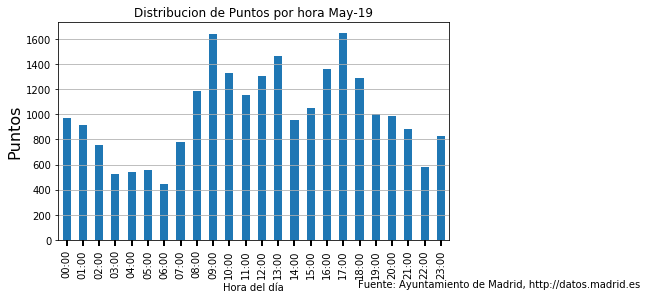

In [117]:
may19_puntos=may19.sort_values('HORA').groupby("hora_entera",sort=False).PUNTOS
fig1 = plt.figure(1,(7,4))
ax1 = fig1.add_subplot(1,1,1)
ax1 = may19_puntos.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Puntos',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(multas_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Puntos por hora May-19')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig1.savefig('puntos_hora_May19',bbox_inches = 'tight')

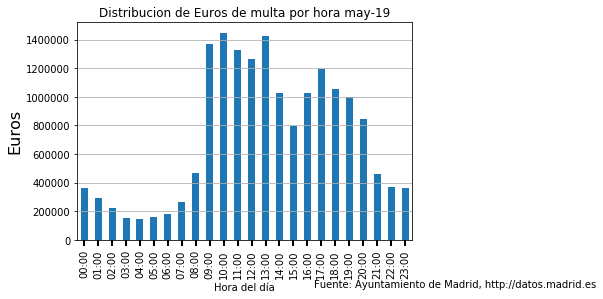

In [118]:
may19_euros=may19.sort_values('HORA').groupby('hora_entera',sort=False).IMPORTE_MULTA
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1 = may19_euros.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Euros',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(may19_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Euros de multa por hora may-19')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('euros_hora',bbox_inches = 'tight')

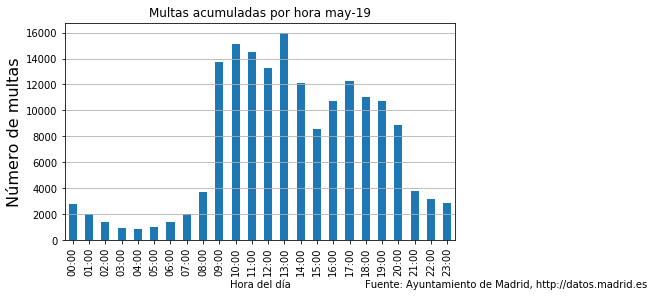

In [119]:
may19_hist=may19['hora_entera'].value_counts().sort_index(axis=0)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=may19_hist.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Número de multas',size=16)
ax.grid(axis='y')
ax.set_title('Multas acumuladas por hora may-19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('multas_hora_may19',bbox_inches = 'tight')

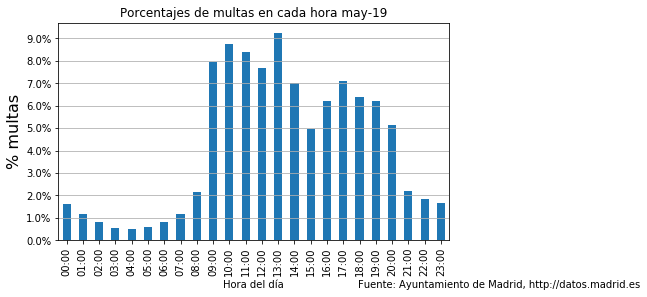

In [120]:
may19_hist_porcentaje=may19['hora_entera'].value_counts().sort_index(axis=0)/len(may19)*100
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=may19_hist_porcentaje.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('% multas',size=16)
ax.grid(axis='y')
ax.set_title('Porcentajes de multas en cada hora may-19')
fmt = '%3.1f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('may19_hora_porcentaje_may19',bbox_inches = 'tight')

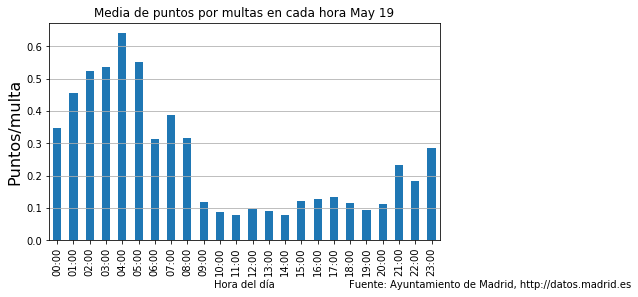

In [121]:
ratio_puntos_may19=may19_puntos.sum()/may19_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_puntos_may19.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Puntos/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de puntos por multas en cada hora May 19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_puntos_multa_May19',bbox_inches = 'tight')

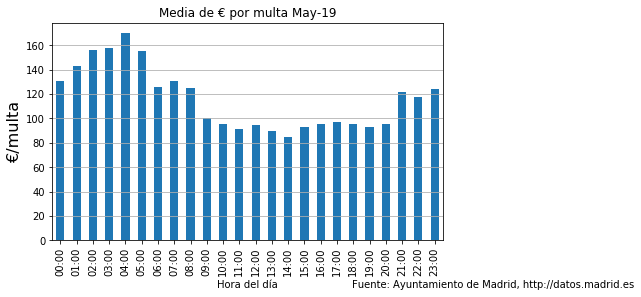

In [122]:
ratio_euros_may19=may19_euros.sum()/may19_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_euros_may19.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('€/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de € por multa May-19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_euros_multa_May19',bbox_inches = 'tight')

## 3.3 Primavera
### 3.3.1 Marzo, abril y mayo

#### 3.3.1.1 Puntos

Como podemos observar durante los meses de primavera en comparacion con las otras epocas se ve un cambio porcentual en la acumulación del número de multas con mayor infracción teniendo como pico principal el horario de las 13:00 horas bajando a segundo puesto el de las 10:00 horas, con lo que podemos mencionar que debido a la epoca en ese horario las personas salen mas a comer ya que es el horario mas comun para el almuerzo. Así mismo está muy marcado en la distribución de puntos que en las horas de las 9:00, las 12:00 y se les suma las 17:00 horas en la que tienen una mayor cantidad de puntos puestos por infracción cometida. Es muy importante mencionar que las infracciones más graves se comenten en horarios de poca circulacion de automoviles en el que en este periodo aumenta ya que se ve una distribucion de acumulacion tiene un incremento de todos los horarios de las primeras horas que van de las 00:00 a las 8:00 en las cuales podemos mencionar que debido a un buen clima se sale mas y existe mas circulacion de automoviles.

#### 3.3.1.2 Euros

La mayor parte de las multas están situadas en la franja horaria entre las nueve de la mañana y la una del mediodía, concidiendo con la joranda laboral y, por tanto, momento en el que más circulación hay durante el día. Una particularidad que diferencia a esta estación con el invierno y el otoño es que se producen más multas por las tardes: hechos como que haya más horas deluz solar o la mejora de temparatura invitan a la gente a conducir, y por tanto, a recibir más multas. Las multas más caras están situadas durante la noche, esto se debe a que son las más graves: las multas relacionadas con alcoholemia. Pese a esto último, si nos fijamos en la distrución de euros de multa por hora, la franja en la que se recauda más coincide con la franja en las que más multas hay.

### 2.10.1 Junio 2019

In [123]:
jun19 = pd.read_csv(path_web0619, sep=';', encoding='windows-1250', 
                    index_col=False, header=None,names=nombre_columnas0619,skiprows=1)

#### 2.10.1.1 Convertimos la variable 'hora' a string para modificarla a formato 'HH:00', reemplazamos el '.' por los ':' y convertimos los string a formato fecha-hora

In [124]:
jun19.HORA=jun19.HORA.apply(lambda i: str(i))
jun19.dtypes

GRAVEDAD                   object
DIRECCION                  object
MES                         int64
ANIO                        int64
HORA                       object
IMPORTE_MULTA             float64
DESCUENTO                  object
PUNTOS                      int64
DENUNCIANTE                object
DESCRIPCION_INFRACCION     object
VELOCIDAD_LIMITE           object
VELOCIDAD_CIRCULACION      object
COORDENADA_X               object
COORDENADA_Y               object
dtype: object

In [125]:
jun19['HORA']=jun19.HORA.apply(lambda i: i.replace('.',':'))
jun19.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,GRAVE,"M 30 KM 10,300 XC CARRIL 3",6,2019,11:29,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,138,,
1,LEVE,CL SANTA ENGRACIA 179,6,2019,17:1,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,
2,LEVE,CL BRAVO MURILLO 46,6,2019,18:02,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,
3,LEVE,CL SANTA ENGRACIA 173,6,2019,19:05,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
4,GRAVE,AV SENECA S/N,6,2019,10:56,200.0,SI,0,AGENTES DE MOVILIDAD,"ESTACIONAR EN CARRIL RESERVADO PARA USO, PARAD...",,,,


In [126]:
jun19['HORA']=pd.to_datetime(jun19['HORA'],format='%H:%M')
jun19.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,GRAVE,"M 30 KM 10,300 XC CARRIL 3",6,2019,1900-01-01 11:29:00,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,138,,
1,LEVE,CL SANTA ENGRACIA 179,6,2019,1900-01-01 17:01:00,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,
2,LEVE,CL BRAVO MURILLO 46,6,2019,1900-01-01 18:02:00,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,
3,LEVE,CL SANTA ENGRACIA 173,6,2019,1900-01-01 19:05:00,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
4,GRAVE,AV SENECA S/N,6,2019,1900-01-01 10:56:00,200.0,SI,0,AGENTES DE MOVILIDAD,"ESTACIONAR EN CARRIL RESERVADO PARA USO, PARAD...",,,,


In [127]:
for n in range(0,jun19.shape[0]):
    jun19.set_value(n,'hora_entera',jun19.loc[n,'HORA'].strftime('%H')+':00');

/Users/jaimecases/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [128]:
puntos_totales=jun19.PUNTOS.sum()
print ('Puntos total perdidos: {:,.0f} puntos'.format(puntos_totales))

Puntos total perdidos: 22,143 puntos


In [129]:
euros_totales=jun19.IMPORTE_MULTA.sum()

#### 2.10.1.2 Ploteamos distintos gráficos para el mes de junio y averiguar las variables que nos interesan

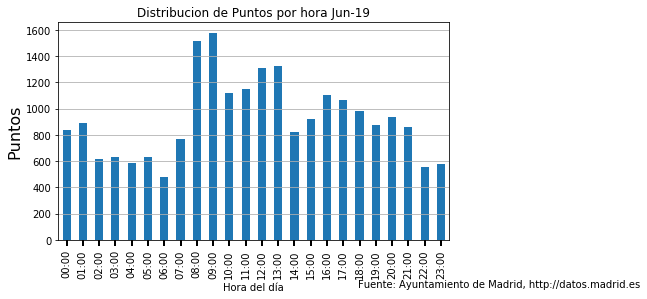

In [130]:
jun19_puntos=jun19.sort_values('HORA').groupby("hora_entera",sort=False).PUNTOS
fig1 = plt.figure(1,(7,4))
ax1 = fig1.add_subplot(1,1,1)
ax1 = jun19_puntos.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Puntos',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(multas_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Puntos por hora Jun-19')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig1.savefig('puntos_hora_Jun19',bbox_inches = 'tight')

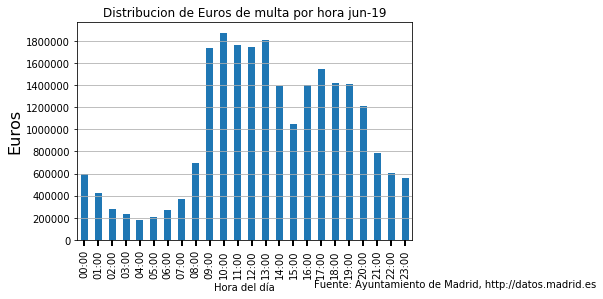

In [131]:
jun19_euros=jun19.sort_values('HORA').groupby('hora_entera',sort=False).IMPORTE_MULTA
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1 = jun19_euros.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Euros',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(jun19_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Euros de multa por hora jun-19')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('euros_hora',bbox_inches = 'tight')

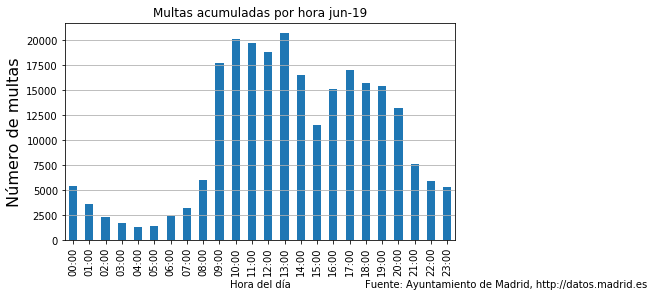

In [132]:
jun19_hist=jun19['hora_entera'].value_counts().sort_index(axis=0)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=jun19_hist.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Número de multas',size=16)
ax.grid(axis='y')
ax.set_title('Multas acumuladas por hora jun-19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('multas_hora_jun19',bbox_inches = 'tight')

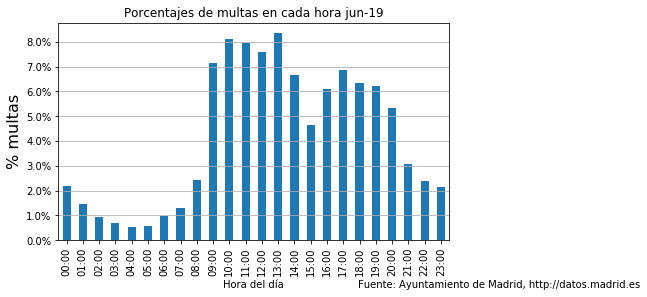

In [133]:
jun19_hist_porcentaje=jun19['hora_entera'].value_counts().sort_index(axis=0)/len(jun19)*100
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=jun19_hist_porcentaje.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('% multas',size=16)
ax.grid(axis='y')
ax.set_title('Porcentajes de multas en cada hora jun-19')
fmt = '%3.1f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('jun19_hora_porcentaje_jun19',bbox_inches = 'tight')

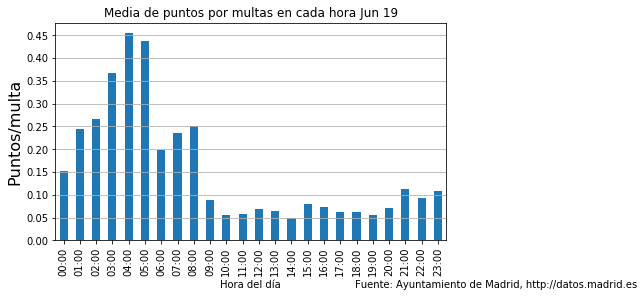

In [134]:
ratio_puntos_jun19=jun19_puntos.sum()/jun19_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_puntos_jun19.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Puntos/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de puntos por multas en cada hora Jun 19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_puntos_multa_Jun19',bbox_inches = 'tight')

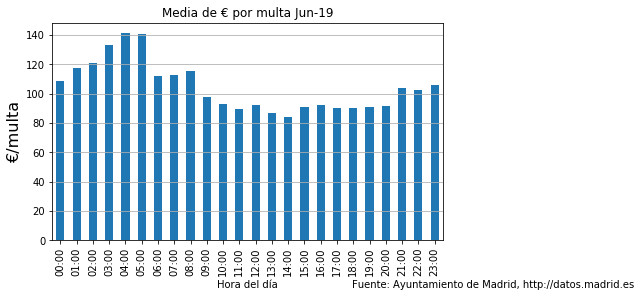

In [135]:
ratio_euros_jun19=jun19_euros.sum()/jun19_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_euros_jun19.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('€/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de € por multa Jun-19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_euros_multa_Jun19',bbox_inches = 'tight')

### 2.11.1 Julio 2019

In [136]:
jul19 = pd.read_csv(path_web0719, sep=';', encoding='windows-1250', 
                    index_col=False, header=None,names=nombre_columnas0719,skiprows=1)

#### 2.3.11.1 Convertimos la variable 'hora' a string para modificarla a formato 'HH:00', reemplazamos el '.' por los ':' y convertimos los string a formato fecha-hora

In [137]:
jul19.HORA=jul19.HORA.apply(lambda i: str(i))
jul19.dtypes

GRAVEDAD                   object
DIRECCION                  object
MES                         int64
ANIO                        int64
HORA                       object
IMPORTE_MULTA             float64
DESCUENTO                  object
PUNTOS                      int64
DENUNCIANTE                object
DESCRIPCION_INFRACCION     object
VELOCIDAD_LIMITE           object
VELOCIDAD_CIRCULACION      object
COORDENADA_X               object
COORDENADA_Y               object
dtype: object

In [138]:
jul19['HORA']=jul19.HORA.apply(lambda i: i.replace('.',':'))
jul19.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,LEVE,CALLE TOLEDO 123,7,2019,0:46,90.0,SI,0,AGENTES DE MOVILIDAD,ACCEDER A MADRID CENTRAL SIN AUTORIZACIÓN. ...,,,,
1,LEVE,CL PEDRO TEIXEIRA 16,7,2019,18:11,90.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACIÓN. ...,,,,
2,LEVE,CL PEDRO TEIXEIRA 10,7,2019,18:51,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
3,LEVE,CL PEDRO TEIXEIRA 10,7,2019,19:06,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
4,LEVE,CL SAN GERMAN 7,7,2019,19:27,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,


In [139]:
jul19['HORA']=pd.to_datetime(jul19['HORA'],format='%H:%M')
jul19.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,LEVE,CALLE TOLEDO 123,7,2019,1900-01-01 00:46:00,90.0,SI,0,AGENTES DE MOVILIDAD,ACCEDER A MADRID CENTRAL SIN AUTORIZACIÓN. ...,,,,
1,LEVE,CL PEDRO TEIXEIRA 16,7,2019,1900-01-01 18:11:00,90.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACIÓN. ...,,,,
2,LEVE,CL PEDRO TEIXEIRA 10,7,2019,1900-01-01 18:51:00,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
3,LEVE,CL PEDRO TEIXEIRA 10,7,2019,1900-01-01 19:06:00,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
4,LEVE,CL SAN GERMAN 7,7,2019,1900-01-01 19:27:00,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,


In [140]:
for n in range(0,jul19.shape[0]):
    jul19.set_value(n,'hora_entera',jul19.loc[n,'HORA'].strftime('%H')+':00');

/Users/jaimecases/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [141]:
puntos_totales=jul19.PUNTOS.sum()
print ('Puntos total perdidos: {:,.0f} puntos'.format(puntos_totales))

Puntos total perdidos: 22,249 puntos


In [142]:
euros_totales=jul19.IMPORTE_MULTA.sum()

#### 2.3.11.2 Ploteamos distintos gráficos para el mes de julio y averiguar las variables que nos interesan

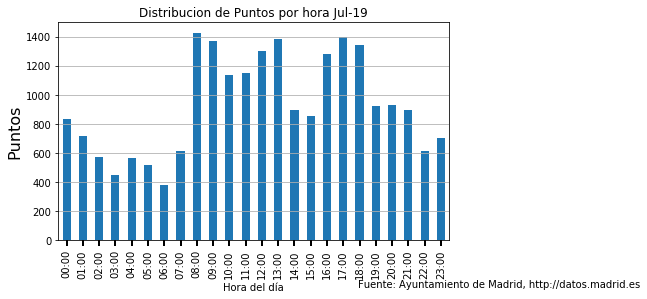

In [143]:
jul19_puntos=jul19.sort_values('HORA').groupby("hora_entera",sort=False).PUNTOS
fig1 = plt.figure(1,(7,4))
ax1 = fig1.add_subplot(1,1,1)
ax1 = jul19_puntos.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Puntos',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(multas_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Puntos por hora Jul-19')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig1.savefig('puntos_hora_Jul19',bbox_inches = 'tight')

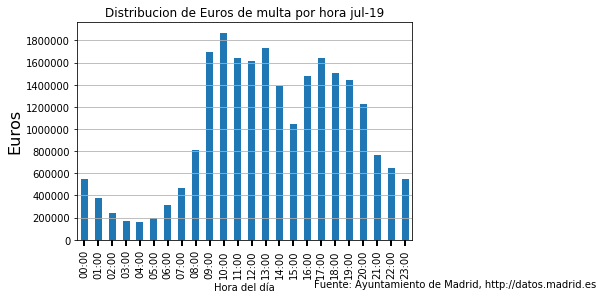

In [144]:
jul19_euros=jul19.sort_values('HORA').groupby('hora_entera',sort=False).IMPORTE_MULTA
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1 = jul19_euros.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Euros',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(jul19_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Euros de multa por hora jul-19')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('euros_hora',bbox_inches = 'tight')

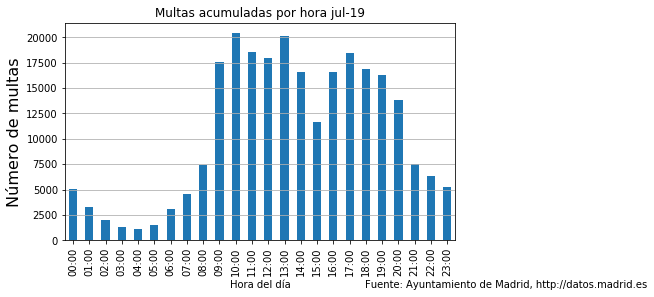

In [145]:
jul19_hist=jul19['hora_entera'].value_counts().sort_index(axis=0)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=jul19_hist.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Número de multas',size=16)
ax.grid(axis='y')
ax.set_title('Multas acumuladas por hora jul-19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('multas_hora_jul19',bbox_inches = 'tight')

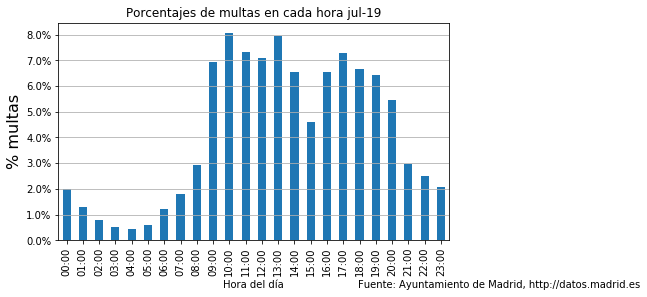

In [146]:
jul19_hist_porcentaje=jul19['hora_entera'].value_counts().sort_index(axis=0)/len(jul19)*100
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=jul19_hist_porcentaje.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('% multas',size=16)
ax.grid(axis='y')
ax.set_title('Porcentajes de multas en cada hora jul-19')
fmt = '%3.1f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('jul19_hora_porcentaje_jul19',bbox_inches = 'tight')

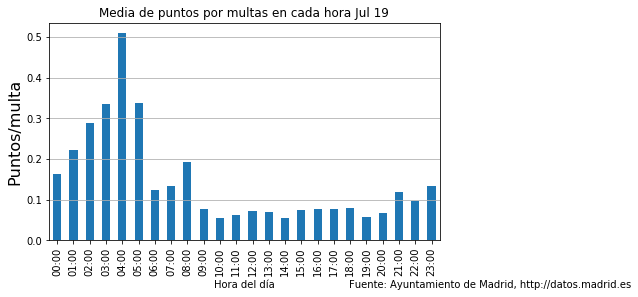

In [147]:
ratio_puntos_jul19=jul19_puntos.sum()/jul19_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_puntos_jul19.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Puntos/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de puntos por multas en cada hora Jul 19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_puntos_multa_Jul19',bbox_inches = 'tight')

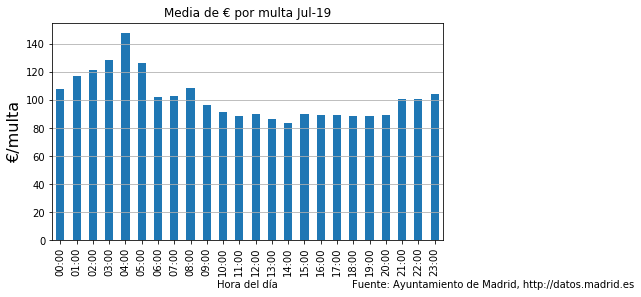

In [148]:
ratio_euros_jul19=jul19_euros.sum()/jul19_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_euros_jul19.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('€/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de € por multa Jul-19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_euros_multa_Jul19',bbox_inches = 'tight')

### 2.12.1 Agosto 2019

In [149]:
ago19 = pd.read_csv(path_web0819, sep=';', encoding='windows-1250', 
                    index_col=False, header=None,names=nombre_columnas0819,skiprows=1)

#### 2.3.12.1 Convertimos la variable 'hora' a string para modificarla a formato 'HH:00', reemplazamos el '.' por los ':' y convertimos los string a formato fecha-hora

In [150]:
ago19.HORA=ago19.HORA.apply(lambda i: str(i))
ago19.dtypes

GRAVEDAD                   object
DIRECCION                  object
MES                         int64
ANIO                        int64
HORA                       object
IMPORTE_MULTA             float64
DESCUENTO                  object
PUNTOS                      int64
DENUNCIANTE                object
DESCRIPCION_INFRACCION     object
VELOCIDAD_LIMITE           object
VELOCIDAD_CIRCULACION      object
COORDENADA_X               object
COORDENADA_Y               object
dtype: object

In [151]:
ago19['HORA']=ago19.HORA.apply(lambda i: i.replace('.',':'))
ago19.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,LEVE,CL CORAZON DE MARIA 65,8,2019,9:37,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
1,GRAVE,CL ARZOBISPO MORCILLO 1,8,2019,10:37,200.0,SI,0,SER,"ESTACIONAR EN CARRIL RESERVADO PARA USO, PARAD...",,,,
2,LEVE,CL ARZOBISPO MORCILLO 1,8,2019,10:49,90.0,SI,0,SER,ESTACIONAR SOBRE LA ACERA. ...,,,,
3,LEVE,CALLE ALCALA 51,8,2019,18:07,90.0,SI,0,AGENTES DE MOVILIDAD,ACCEDER A MADRID CENTRAL SIN AUTORIZACIÓN. ...,,,,
4,LEVE,PO LA HABANA 42,8,2019,9:44,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,


In [152]:
ago19['HORA']=pd.to_datetime(ago19['HORA'],format='%H:%M')
ago19.head()

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y
0,LEVE,CL CORAZON DE MARIA 65,8,2019,1900-01-01 09:37:00,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
1,GRAVE,CL ARZOBISPO MORCILLO 1,8,2019,1900-01-01 10:37:00,200.0,SI,0,SER,"ESTACIONAR EN CARRIL RESERVADO PARA USO, PARAD...",,,,
2,LEVE,CL ARZOBISPO MORCILLO 1,8,2019,1900-01-01 10:49:00,90.0,SI,0,SER,ESTACIONAR SOBRE LA ACERA. ...,,,,
3,LEVE,CALLE ALCALA 51,8,2019,1900-01-01 18:07:00,90.0,SI,0,AGENTES DE MOVILIDAD,ACCEDER A MADRID CENTRAL SIN AUTORIZACIÓN. ...,,,,
4,LEVE,PO LA HABANA 42,8,2019,1900-01-01 09:44:00,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,


In [153]:
for n in range(0,ago19.shape[0]):
    ago19.set_value(n,'hora_entera',ago19.loc[n,'HORA'].strftime('%H')+':00');

/Users/jaimecases/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [154]:
puntos_totales=ago19.PUNTOS.sum()
print ('Puntos total perdidos: {:,.0f} puntos'.format(puntos_totales))

Puntos total perdidos: 19,373 puntos


In [155]:
euros_totales=ago19.IMPORTE_MULTA.sum()

#### 2.3.12.2 Ploteamos distintos gráficos para el mes de agosto y averiguar las variables que nos interesan

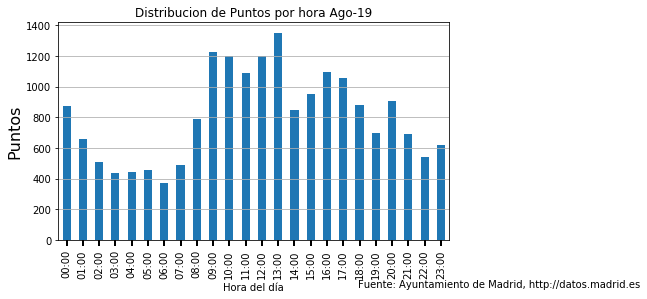

In [156]:
ago19_puntos=ago19.sort_values('HORA').groupby("hora_entera",sort=False).PUNTOS
fig1 = plt.figure(1,(7,4))
ax1 = fig1.add_subplot(1,1,1)
ax1 = ago19_puntos.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Puntos',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(multas_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Puntos por hora Ago-19')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig1.savefig('puntos_hora_Ago19',bbox_inches = 'tight')

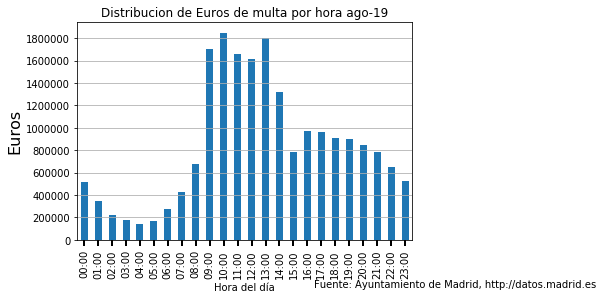

In [157]:
ago19_euros=ago19.sort_values('HORA').groupby('hora_entera',sort=False).IMPORTE_MULTA
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1 = ago19_euros.sum().plot.bar()
ax1.locator_params(axis='y',nbins=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Euros',size=16)
ax1.tick_params(axis='x',direction='out', length=6, width=2, colors='black')
#ax1.set_xticklabels(ago19_euros['hora_entera'])
ax1.grid(axis='y')
ax1.set_title('Distribucion de Euros de multa por hora ago-19')
fig1.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('euros_hora',bbox_inches = 'tight')

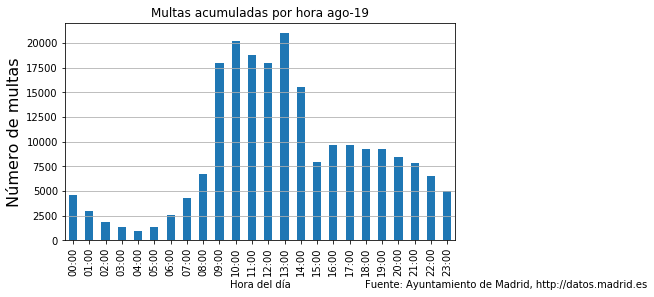

In [158]:
ago19_hist=ago19['hora_entera'].value_counts().sort_index(axis=0)
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ago19_hist.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Número de multas',size=16)
ax.grid(axis='y')
ax.set_title('Multas acumuladas por hora ago-19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('multas_hora_ago19',bbox_inches = 'tight')

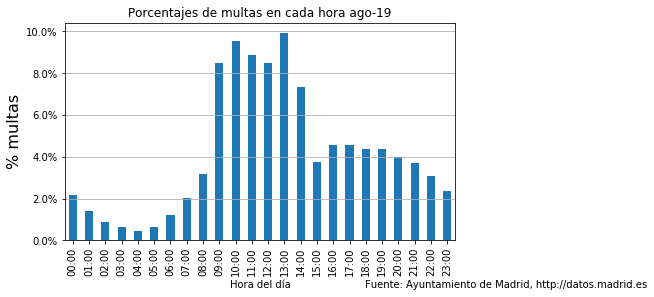

In [159]:
ago19_hist_porcentaje=ago19['hora_entera'].value_counts().sort_index(axis=0)/len(ago19)*100
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ago19_hist_porcentaje.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('% multas',size=16)
ax.grid(axis='y')
ax.set_title('Porcentajes de multas en cada hora ago-19')
fmt = '%3.1f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('ago19_hora_porcentaje_ago19',bbox_inches = 'tight')

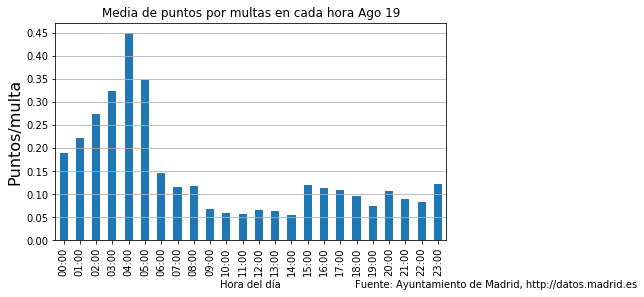

In [160]:
ratio_puntos_ago19=ago19_puntos.sum()/ago19_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_puntos_ago19.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Puntos/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de puntos por multas en cada hora Ago 19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_puntos_multa_Ago19',bbox_inches = 'tight')

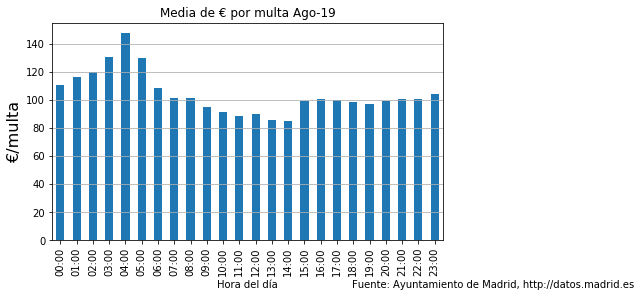

In [161]:
ratio_euros_ago19=ago19_euros.sum()/ago19_hist
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax=ratio_euros_ago19.plot.bar()
ax.locator_params(axis='y',nbins=10)
ax.set_xlabel('Hora del día')
ax.set_ylabel('€/multa',size=16)
ax.grid(axis='y')
ax.set_title('Media de € por multa Ago-19')
fig.suptitle('Fuente: Ayuntamiento de Madrid, http://datos.madrid.es',size=10,x=1,y=-0.01)
fig.savefig('media_euros_multa_Ago19',bbox_inches = 'tight')

## 3.4 Verano
### 3.4.1 Junio, julio y agosto

#### 3.4.1.1 Puntos

Como podemos observar durante los meses de verano en comparacion con las otras epocas se ve un cambio porcentual en la acumulación del número de multas ya que aumenta el numero de multas cometidas en general con respecto a las otras epocas en el que se tiene las mismas variables con mayor infracción las horas de 9:00 a 14:00 sin que existan otros puntos tan elevados. Así mismo está muy marcado en la distribución de puntos que en las horas de las 8:00 y e las 9:00 en la que tienen una mayor cantidad de puntos puestos por infracción cometida. Es muy importante mencionar que las infracciones más graves se comenten en horarios de poca circulacion de automoviles en el que en este periodo aumenta ya que se ve una distribucion de acumulacion tiene un incremento pero en esta epoca se ve radicalmente un horario en especial que es el de las 4:00 horas existe una muy marcada diferencia en la acumulacion de infracciónes de gravedad elevada.

#### 3.4.1.2 Euros

La mayor parte de las multas están situadas en la franja horaria entre las nueve de la mañana y las dos del mediodía, siguiendo la línea de todo el año. Si hablamos de la media de euros por multa por hora, durante el verano existe mucha más igualdad entre horas que durante el año. La tendencia a penalizar multas más costosas durante la madrugada continúa, sin embargo, es menor que en otros meses del año. Agosto, por ejemplo, tiene una diferencia de unos 60€ entre la hora que menos dinero que se recauda y la que más; en el caso de febrero se llegan a registrar más de 120€ de diferencia. Otro aspecto que no varía es la distribución de euros de multa por hora, la franja en la que se recauda más coincide con la franja en las que más multas hay.

In [162]:
multas = pd.concat ([set18, oct18, nov18, dic18, ene19, feb19, mar19, abr19, may19, jun19, jul19, ago19])
multas

,GRAVEDAD,DIRECCION,MES,ANIO,HORA,IMPORTE_MULTA,DESCUENTO,PUNTOS,DENUNCIANTE,DESCRIPCION_INFRACCION,VELOCIDAD_LIMITE,VELOCIDAD_CIRCULACION,COORDENADA_X,COORDENADA_Y,hora_entera
0,LEVE,CL PEDRO RICO F33,9,2018,1900-01-01 17:02:00,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,,17:00
1,LEVE,CL PEDRO RICO F29,9,2018,1900-01-01 17:47:00,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,,17:00
2,LEVE,AV MONFORTE DE LEMOS 4,9,2018,1900-01-01 19:08:00,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,,19:00
3,LEVE,AV MONFORTE DE LEMOS 2,9,2018,1900-01-01 19:16:00,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,,19:00
4,LEVE,CL SOR ANGELA DE LA CRUZ 7,9,2018,1900-01-01 10:12:00,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,,10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211699,LEVE,OBISPO TREJO,8,2019,1900-01-01 13:52:00,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA. ...,,,,,13:00
211700,GRAVE,GRAN VIA 41,8,2019,1900-01-01 20:47:00,200.0,SI,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,,,,,20:00
211701,GRAVE,PZ CIBELES,8,2019,1900-01-01 17:05:00,200.0,SI,4,POLICIA MUNICIPAL,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,,,,17:00
211702,GRAVE,AEROPUERTO SALIDA T 1,8,2019,1900-01-01 00:41:00,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN CARRIL DECIRCULACIÓN OBSTACULIZA...,,,,,00:00


## 4.1 Análisis de la distribución de las variables Septiembre 2018 - Agosto 2019

### 4.1.1 Análisis de la gravedad 

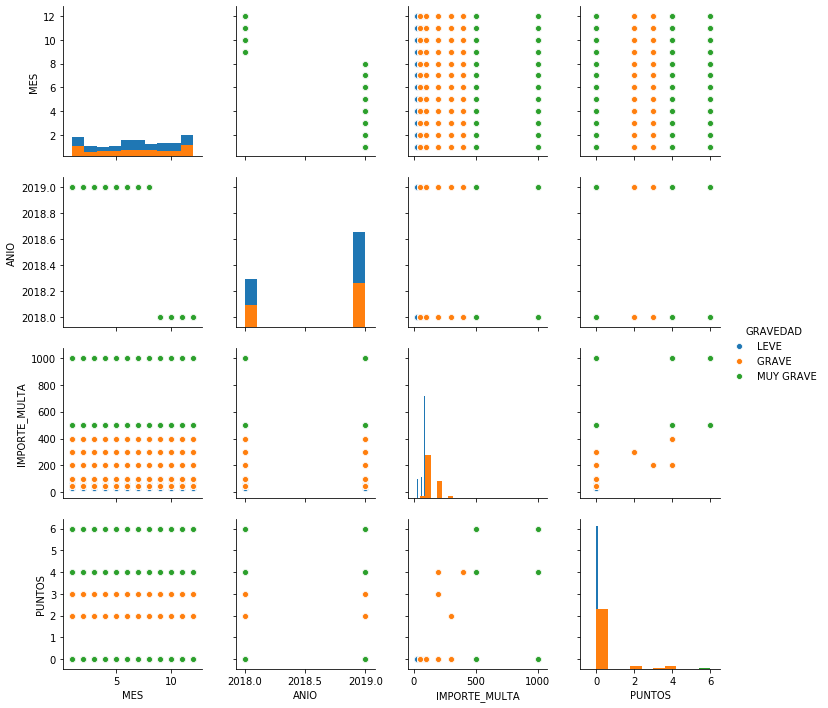

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(multas, hue="GRAVEDAD", diag_kind="hist")

En representación podemos observar que durante el periodo analizado la media de puntos retirados estuvo entre los dos y cuatro puntos dado su nivel de gravedad. Por otro lado, el importe recaudado por las infracciones alcanzó los 400 euros en multas consideradas graves, cabe recalcar que existieron infracciones de alta gravedad que llegaron a rondar los 1000 euros. Para concluir, podemos darnos cuenta de que la mayor parte de las multas son leves, siendo las que menos importe económico conllevan; conforme aumenta la gravedad de la infracción aumenta el precio. 

### 4.1.2 Análisis por mes

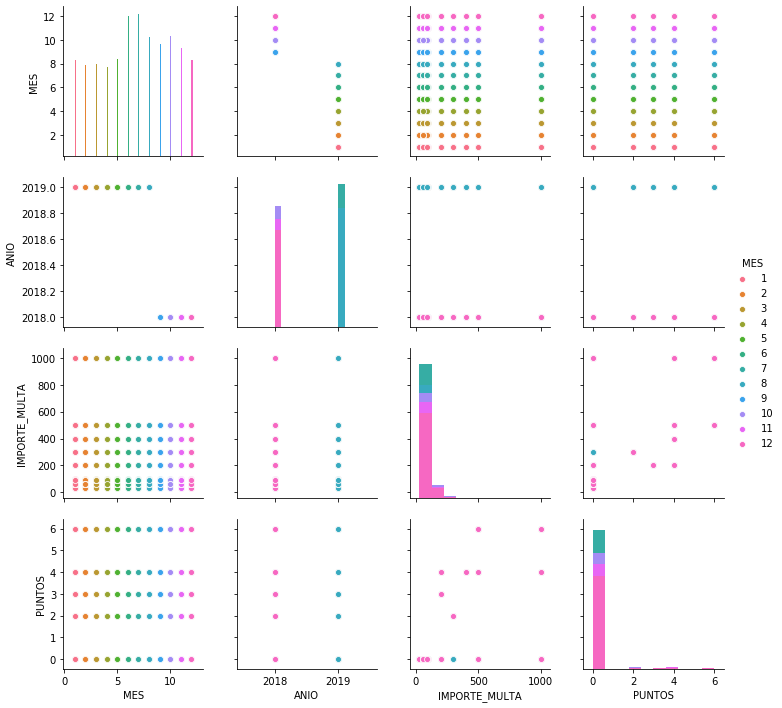

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(multas, hue="MES", diag_kind="hist")

Tal y como puede observarse con los colores, la mayor parte de las multas tienen lugar durante los meses de invierno, es por ello que la intensidad de colores rosados sea similar en cuanto a puntos retirados e importe de multas recaudados. Según lo analizado anteriormente en las otras gráficas sabemos que las multas se repetien con mayor frecuencia en la franja horaria de nueve de la mañana a una del mediodía, las cuales alcanzan un importe de hasta 500 euros. Sin embargo, las multas más caras se producen durante la noche porque se cometen infracciones más graves.

## 5. Conclusiones 

Una vez analizados los doce meses podemos conlcuir los siguiente: durante los meses de invierno es cuando más infracciones se penalizan, debido a que por condiciones climatológicas es cuando más se utiliza el coche; por otro lado, en los meses de verano es cuando menos multas se registran. Dos aspectos que se repiten a lo largo del año es que desde las nueve de la mañana hasta el mediodía es cuando más infracciones existen, concidiendo con la fase del día en la que comienza la jornada laboral; y, por otro lado, las multas más graves (que provocaron la retirada de más puntos y un mayor importe económico) tuvieron lugar de madrugada. 

Pese a nuestros intentos fallidos, nos hubiese gustado realizar diferentes mapas que nos permitiesen ver qué zonas son las que más multas registran, de qué tipo son o a qué horas se producen.